# Anticipez les besoins en consommation de bâtiments

# Notebook modelisation

# Les imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
import shap
from sklearn import metrics
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import shap
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split, GridSearchCV

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [4]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

# Les données

In [5]:
data = pd.read_csv('p4_data.csv')
pd.set_option('display.max_columns', None)
# lire les données et visualiser toutes les colonnes

In [6]:
data.head()

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,steam_elec_gaz
0,Hotel,DOWNTOWN,1927,12,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,1276453.0,249.98,7226362.00
1,Hotel,DOWNTOWN,1996,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,97.900002,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,5145082.0,295.86,8387933.00
2,Hotel,DOWNTOWN,1969,41,956110,196718,759392,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,1493800.0,2089.28,72587018.00
3,Hotel,DOWNTOWN,1926,10,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,1811213.0,286.43,6794583.25
4,Other,DOWNTOWN,1999,2,97288,37198,60090,Police Station,88830.0,NaN,NaN,NaN,NaN,NaN,136.100006,141.600006,12086616.0,12581712.0,0.00,2.160444e+06,7371434.0,4715182.0,301.81,12086616.00


In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PrimaryPropertyType              1409 non-null   object 
 1   Neighborhood                     1409 non-null   object 
 2   YearBuilt                        1409 non-null   int64  
 3   NumberofFloors                   1409 non-null   int64  
 4   PropertyGFATotal                 1409 non-null   int64  
 5   PropertyGFAParking               1409 non-null   int64  
 6   PropertyGFABuilding(s)           1409 non-null   int64  
 7   LargestPropertyUseType           1405 non-null   object 
 8   LargestPropertyUseTypeGFA        1405 non-null   float64
 9   SecondLargestPropertyUseType     722 non-null    object 
 10  SecondLargestPropertyUseTypeGFA  722 non-null    float64
 11  ThirdLargestPropertyUseType      235 non-null    object 
 12  ThirdLargestProperty

In [8]:
data.shape

(1409, 24)

In [9]:
data.describe()

,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,steam_elec_gaz
count,1409.000000,1409.000000,1.409000e+03,1409.000000,1.409000e+03,1.405000e+03,722.000000,235.000000,922.000000,1409.000000,1409.000000,1.409000e+03,1.409000e+03,1.409000e+03,1.409000e+03,1.409000e+03,1.409000e+03,1409.000000,1.409000e+03
mean,1960.995742,3.980128,1.022657e+05,12345.584102,8.992011e+04,8.313371e+04,29462.316201,12403.178723,63.052061,74.077573,76.995316,7.085225e+06,7.260141e+06,4.916473e+05,1.452456e+06,4.955779e+06,1.616610e+06,158.356182,7.064036e+06
std,32.720558,6.175778,1.718397e+05,41327.109910,1.506633e+05,1.404702e+05,54170.241099,27978.482421,28.951183,75.979208,76.832367,1.852093e+07,1.869895e+07,5.507290e+06,3.731642e+06,1.273236e+07,5.439627e+06,581.475138,1.850187e+07
min,1900.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,1.400000,1.500000,5.713320e+04,5.811420e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.400000,5.713300e+04
25%,1929.000000,1.000000,2.838500e+04,0.000000,2.752600e+04,2.460000e+04,4815.000000,2613.500000,43.000000,34.099998,36.599998,1.208029e+06,1.286817e+06,0.000000e+00,2.080864e+05,7.099910e+05,0.000000e+00,19.770000,1.208029e+06
50%,1965.000000,2.000000,4.596000e+04,0.000000,4.441600e+04,4.076800e+04,10423.500000,5471.000000,70.000000,53.099998,55.900002,2.485521e+06,2.652254e+06,0.000000e+00,4.604637e+05,1.571102e+06,4.598420e+05,47.080000,2.491238e+06
75%,1988.000000,4.000000,9.772000e+04,0.000000,8.843400e+04,8.348500e+04,27093.750000,10617.500000,88.000000,83.599998,87.300003,6.461937e+06,6.669622e+06,0.000000e+00,1.333497e+06,4.549891e+06,1.408968e+06,130.320000,6.461936e+06
max,2015.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,1.680937e+06,441551.000000,303910.000000,100.000000,834.400024,834.400024,2.930908e+08,2.966717e+08,1.349435e+08,8.046087e+07,2.745325e+08,1.381912e+08,12307.160000,2.930908e+08


# Selectionner les données pour le modele

# Les features

In [10]:
features = data[['PropertyGFAParking','PropertyGFABuilding(s)','PrimaryPropertyType','ENERGYSTARScore',
              'NumberofFloors','YearBuilt','Neighborhood']]

In [11]:
features.describe()

,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,NumberofFloors,YearBuilt
count,1409.000000,1.409000e+03,922.000000,1409.000000,1409.000000
mean,12345.584102,8.992011e+04,63.052061,3.980128,1960.995742
std,41327.109910,1.506633e+05,28.951183,6.175778,32.720558
min,0.000000,3.636000e+03,1.000000,0.000000,1900.000000
25%,0.000000,2.752600e+04,43.000000,1.000000,1929.000000
50%,0.000000,4.441600e+04,70.000000,2.000000,1965.000000
75%,0.000000,8.843400e+04,88.000000,4.000000,1988.000000
max,512608.000000,1.765970e+06,100.000000,99.000000,2015.000000


In [12]:
features.isnull().sum()

PropertyGFAParking          0
PropertyGFABuilding(s)      0
PrimaryPropertyType         0
ENERGYSTARScore           487
NumberofFloors              0
YearBuilt                   0
Neighborhood                0
dtype: int64

### Supprimmer les valeurs nulles de energy star

In [13]:
data = data.dropna(subset= 'ENERGYSTARScore')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 1393
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PrimaryPropertyType              922 non-null    object 
 1   Neighborhood                     922 non-null    object 
 2   YearBuilt                        922 non-null    int64  
 3   NumberofFloors                   922 non-null    int64  
 4   PropertyGFATotal                 922 non-null    int64  
 5   PropertyGFAParking               922 non-null    int64  
 6   PropertyGFABuilding(s)           922 non-null    int64  
 7   LargestPropertyUseType           920 non-null    object 
 8   LargestPropertyUseTypeGFA        920 non-null    float64
 9   SecondLargestPropertyUseType     424 non-null    object 
 10  SecondLargestPropertyUseTypeGFA  424 non-null    float64
 11  ThirdLargestPropertyUseType      91 non-null     object 
 12  ThirdLargestPropertyU

### Observer les résultats

In [14]:
features = data[['PropertyGFAParking','PropertyGFABuilding(s)','PrimaryPropertyType','ENERGYSTARScore',
              'NumberofFloors','YearBuilt','Neighborhood']]
features.isnull().sum()

PropertyGFAParking        0
PropertyGFABuilding(s)    0
PrimaryPropertyType       0
ENERGYSTARScore           0
NumberofFloors            0
YearBuilt                 0
Neighborhood              0
dtype: int64

# Target 

In [15]:
target = data[['SiteEUIWN(kBtu/sf)']]

In [16]:
target.describe()

,SiteEUIWN(kBtu/sf)
count,922.000000
mean,70.982321
std,72.076942
min,2.100000
25%,36.025000
50%,53.599998
75%,78.199997
max,834.400024


### Correlation entre les features et la target

<AxesSubplot:>

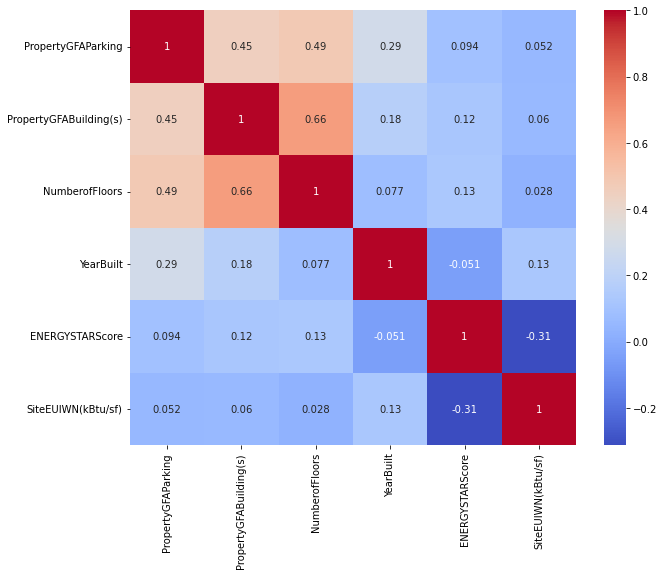

In [23]:
# Calculer la matrice de corrélation
correlation_matrix =  data[['PropertyGFAParking','PropertyGFABuilding(s)','PrimaryPropertyType',
              'NumberofFloors','YearBuilt','Neighborhood','ENERGYSTARScore','SiteEUIWN(kBtu/sf)']].corr()

# Créer la heatmap
plt.figure(figsize=(10, 8))  # Définir la taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [18]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 1393
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PropertyGFAParking      922 non-null    int64  
 1   PropertyGFABuilding(s)  922 non-null    int64  
 2   PrimaryPropertyType     922 non-null    object 
 3   ENERGYSTARScore         922 non-null    float64
 4   NumberofFloors          922 non-null    int64  
 5   YearBuilt               922 non-null    int64  
 6   Neighborhood            922 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 57.6+ KB


# Fonctions pour visualiser les resultats

In [19]:
#fonction pour tracer les graphiques de comparaison entre les valeurs réelles et prédites total energy


def plot_comparison_energy(y_test, y_pred):

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, label='Réel', marker='o', color='blue')
    plt.scatter(y_pred, y_pred, label='Prédiction', marker='x', color='red')

    plt.legend()
    plt.title("Comparaison des valeurs réelles et prédites pour l'energie total")
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Valeurs prédites')
    plt.show()

# Fonction pretraitement et fit du model

In [20]:
def preprocess_and_train_model(features, target, model, columns_to_normalize,columns_to_encode,test_size=0.2, random_state=42):

     #Créer les transformateurs pour la normalisation et l'encodage
    transformateurs =ColumnTransformer ([
    ('normalisation', StandardScaler(), columns_to_normalize),
    ('encodage', OneHotEncoder(handle_unknown='ignore'), columns_to_encode)
])
    # Créer la pipeline avec le préprocesseur et le modèle
    pipeline = Pipeline([("preprocess", transformateurs), ("model", model)])

    
    # Séparer les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=random_state, 
                                                        stratify=pd.qcut(target.squeeze(), 4))


    pipeline.fit(X_train, y_train)

   # Faire des prédictions sur l'ensemble d'entraînement et l'ensemble de test
    predictions_train = pipeline.predict(X_train)
    predictions_test = pipeline.predict(X_test)
    
    # Calculer les métriques pour l'ensemble d'entraînement
    mse_train = mean_squared_error(y_train, predictions_train)
    r2_train = r2_score(y_train, predictions_train)
    
    # Calculer les métriques pour l'ensemble de test
    mse_test = mean_squared_error(y_test, predictions_test)
    r2_test = r2_score(y_test, predictions_test)
    
    # Afficher les métriques pour l'ensemble d'entraînement
    print("Train Mean Squared Error:", mse_train)
    print("Train R-squared:", r2_train)
    
    # Afficher les métriques pour l'ensemble de test
    print("Test Mean Squared Error:", mse_test)
    print("Test R-squared:", r2_test)
    
    # Appeler la fonction pour afficher la comparaison entre les valeurs réelles et prédites pour l'ensemble de test
    plot_comparison_energy(y_test, predictions_test)
    
    return pipeline



# Un model naif(Dummy regressor )

In [24]:
columns_to_normalize = ['PropertyGFAParking', 'PropertyGFABuilding(s)', 'NumberofFloors','ENERGYSTARScore']
columns_to_encode = ['PrimaryPropertyType', 'Neighborhood', 'YearBuilt']

In [25]:
model = DummyRegressor(strategy= 'mean')

In [26]:
target.shape

(922, 1)

In [27]:
 target.squeeze().shape

(922,)

Train Mean Squared Error: 5383.648498328691
Train R-squared: 0.0
Test Mean Squared Error: 4415.936056514062
Test R-squared: -0.0001419443159362821


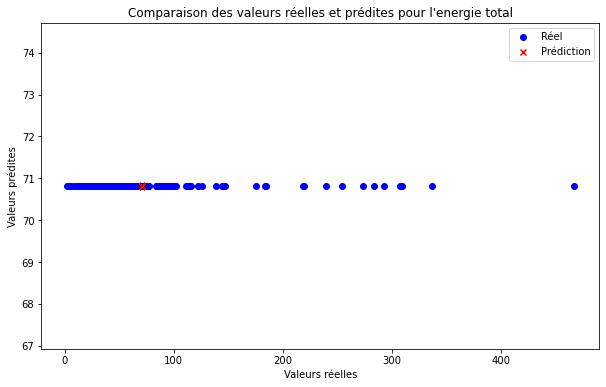

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', DummyRegressor())])

In [28]:
preprocess_and_train_model(features, target, model,columns_to_normalize,columns_to_encode ,test_size=0.2, random_state=42)

#  Regression lineaire

In [29]:
columns_to_normalize = ['PropertyGFAParking', 'PropertyGFABuilding(s)', 'NumberofFloors','ENERGYSTARScore']
columns_to_encode = ['PrimaryPropertyType', 'Neighborhood', 'YearBuilt']

Train Mean Squared Error: 2326.577509397866
Train R-squared: 0.5678437197153321
Test Mean Squared Error: 2834.8019601448314
Test R-squared: 0.35796073405827633


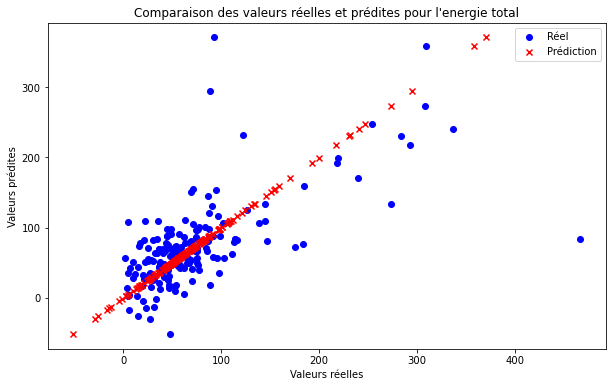

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', LinearRegression())])

In [30]:
preprocess_and_train_model(features, target, LinearRegression(),columns_to_normalize,columns_to_encode ,test_size=0.2, random_state=42)

# Fonction de traitement et d'entrainement &grid search

In [31]:

def preprocess_and_train_model_grid_search(features, target, model, columns_to_normalize, columns_to_encode,
                               param_grid, test_size=0.2, random_state=42):
    
 
    transformateurs = ColumnTransformer([
        ('normalisation', StandardScaler(), columns_to_normalize),
        ('encodage', OneHotEncoder(handle_unknown='ignore'), columns_to_encode)
    ])
    
    pipeline = Pipeline([("preprocess", transformateurs), ("model", model)])
    
       # Séparer les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=random_state, 
                                                        stratify=pd.qcut(target.squeeze(), 4))
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring= "r2")

    grid_search.fit(X_train, y_train)
    
    result = grid_search.cv_results_
    #best_index_2 = np.flatnonzero(result['rank_test_score'] == 1)[0]
    best_index = np.argmax(result['mean_test_score'])
    
    print('cv R-squared',result['mean_test_score'][best_index])

    print('mean_score_time', result['mean_score_time'][best_index])
    print('mean_fit_time', result['mean_fit_time'][best_index])
 
    
    best_pipeline = grid_search.best_estimator_
    
    
    predictions = best_pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print("Test Mean Squared Error:", mse)
    print("Test R-squared:", r2)
    #print(result)
    plot_comparison_energy(y_test, predictions)
    
    return best_pipeline


# Decision tree regressor avec le Log de la target

In [32]:
# defenir le model avec la methode log
model = TransformedTargetRegressor(
    regressor=DecisionTreeRegressor(), func=np.log1p, inverse_func=np.expm1
)

 nous utilisons np.log1p plutôt que np.log pour éviter les erreurs lorsque les valeurs sont nulles ou négatives.  
La transformation logarithmique est souvent utilisée pour stabiliser les distributions de données qui présentent des valeurs  
très élevées ou très basses, et np.log1p est une alternative efficace à np.log(1 + X) pour cette tâche.

In [35]:
param_grid = {
    'model__regressor__max_depth': [None,20,50],  # Hyperparameter for DecisionTreeRegressor
    'model__regressor__min_samples_split': [7,8,9],  # Hyperparameter for DecisionTreeRegressor
}

cv R-squared 0.44017029888025955
mean_score_time 0.0029440402984619142
mean_fit_time 0.009037256240844727
Test Mean Squared Error: 1605.5207676227594
Test R-squared: 0.6363741137507734


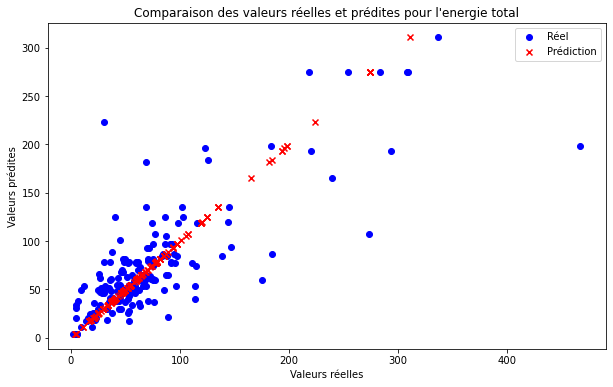

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
               

In [36]:
preprocess_and_train_model_grid_search(features, target, model, columns_to_normalize, columns_to_encode,
                               param_grid, test_size=0.2, random_state=42)


## Entrainer le meilleure model

In [37]:
# defenir le model avec la methode log
model =TransformedTargetRegressor(regressor= DecisionTreeRegressor(max_depth = 50, min_samples_split=7), 
                                  func=np.log1p, inverse_func=np.expm1)


Train Mean Squared Error: 845.4507227915109
Train R-squared: 0.8429595240005038
Test Mean Squared Error: 1594.5174853430315
Test R-squared: 0.6388661888153275


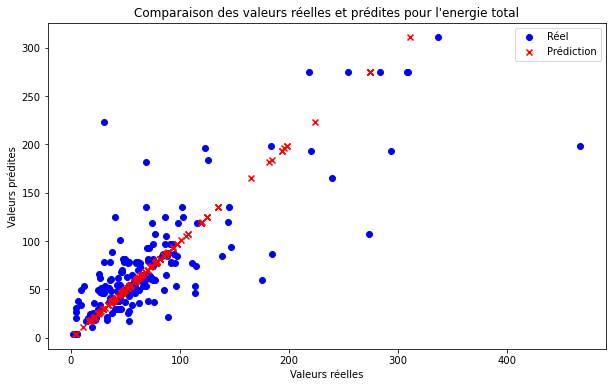

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
               

In [38]:
preprocess_and_train_model(features, target,model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

# Decision tree regressor sans le Log de la target

In [42]:
# defenir le model avec la methode log
model =DecisionTreeRegressor()


In [45]:
param_grid = {
    'model__max_depth': [None,10, 20],  # Hyperparameter for DecisionTreeRegressor
    'model__min_samples_split': [2,7, 10],  # Hyperparameter for DecisionTreeRegressor
}

cv R-squared 0.5275636300837088
mean_score_time 0.004672479629516601
mean_fit_time 0.011103105545043946
Test Mean Squared Error: 1718.8169555031589
Test R-squared: 0.610714260849793


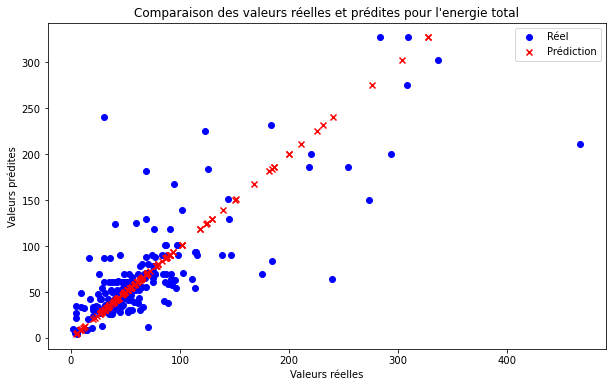

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', DecisionTreeRegressor(max_depth=20))])

In [46]:
preprocess_and_train_model_grid_search(features, target, model, columns_to_normalize, columns_to_encode,
                               param_grid, test_size=0.2, random_state=42)


## Entrainer le meilleure model

In [47]:
# defenir le model avec la methode log
model = DecisionTreeRegressor(max_depth =20)
                                 


Train Mean Squared Error: 43.68681977946865
Train R-squared: 0.991885276352453
Test Mean Squared Error: 1658.5361671551773
Test R-squared: 0.624366936996295


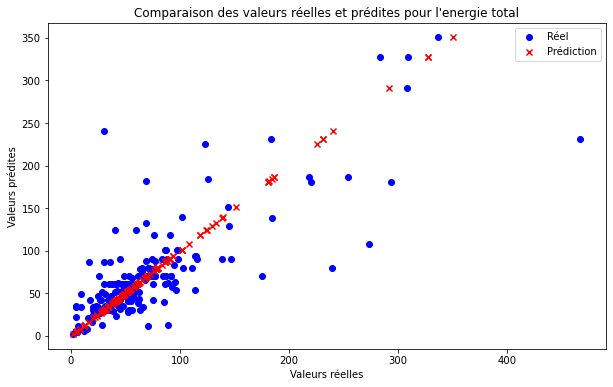

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', DecisionTreeRegressor(max_depth=20))])

In [48]:
preprocess_and_train_model(features, target,model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

Les resultats de DTR ne sont pas trés bon,  il ya clairement une tres grande difference entre l'entrainement et le test et donc le model c'est trop ajuster au données de train et n'arrive pas s'adapter au nouvelle données (overfitting) pour la methode sans le log de la target


# Lasso Grid avec le log de la target

In [49]:
model = TransformedTargetRegressor(
    regressor=Lasso(), func=np.log1p, inverse_func=np.expm1
)

In [50]:
# Créez un dictionnaire des hyperparamètres 
param_grid = {
    'model__regressor__alpha':  [0.1, 0.01, 0.001]   # Liste des valeurs d'alpha 

}


cv R-squared 0.36159239051247244
mean_score_time 0.00330963134765625
mean_fit_time 0.0070076465606689455
Test Mean Squared Error: 1821.3605039365987
Test R-squared: 0.5874897162470717


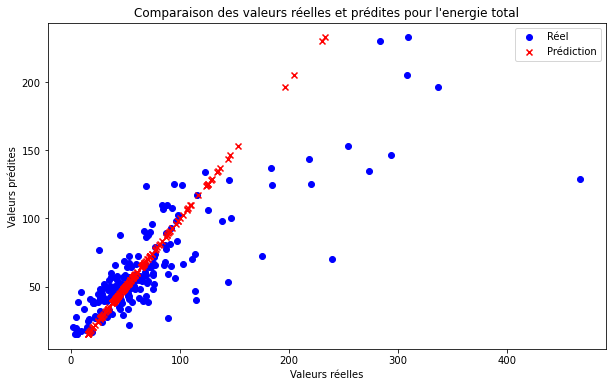

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
               

In [51]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [52]:
model = TransformedTargetRegressor(
    regressor=Lasso(alpha= 0.01), func=np.log1p, inverse_func=np.expm1
)

Train Mean Squared Error: 3687.343295370783
Train R-squared: 0.31508468717534444
Test Mean Squared Error: 1821.3605039365987
Test R-squared: 0.5874897162470717


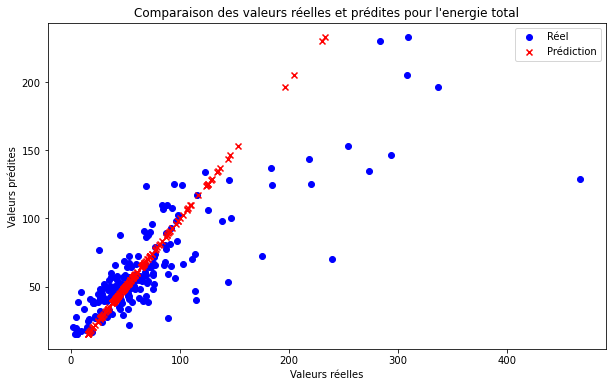

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
               

In [53]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

Il n'y a pas d'overfitting dans ce model mais les resultats reste trés faible  


#  Lasso grid search sans le Log de la  target

In [54]:
model = Lasso()

In [55]:
# Créez un dictionnaire des hyperparamètres 
param_grid = {
    'model__alpha': [0.1, 0.01,0.001]   # Liste des valeurs d'alpha 

}


Objective did not converge. You might want to increase the number of iterations. Duality gap: 11445.31000547111, tolerance: 362.8378532828461
Objective did not converge. You might want to increase the number of iterations. Duality gap: 10439.458048202796, tolerance: 322.53817714890926


cv R-squared 0.19708879250012318
mean_score_time 0.00461273193359375
mean_fit_time 0.01104583740234375
Test Mean Squared Error: 2253.3630759470057
Test R-squared: 0.48964774417353474


Objective did not converge. You might want to increase the number of iterations. Duality gap: 16756.48902760283, tolerance: 262.36364943616576


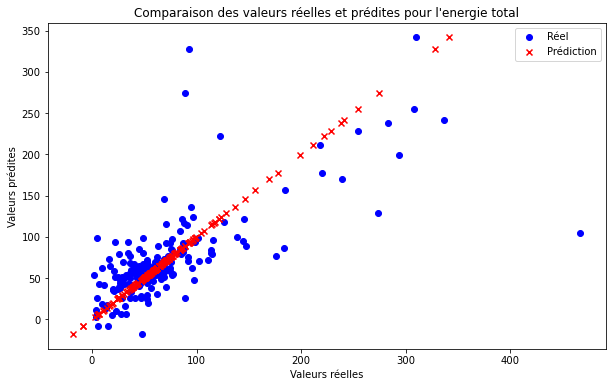

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', Lasso(alpha=0.1))])

In [56]:
preprocess_and_train_model_grid_search(features, target, model, columns_to_normalize, columns_to_encode,param_grid,  test_size=0.2, random_state=42 )

## Entrainer le meilleure model

In [57]:
model = Lasso(alpha = 0.1)

Train Mean Squared Error: 2428.1975570648992
Train R-squared: 0.5489680357440287
Test Mean Squared Error: 2253.3630759470057
Test R-squared: 0.48964774417353474


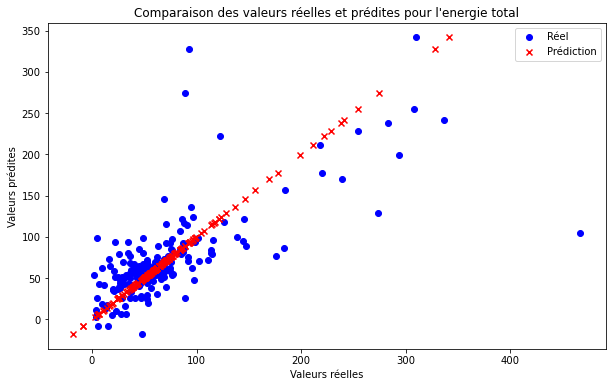

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', Lasso(alpha=0.1))])

In [59]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

Il ya une amélioration sans l'overfitting

# Ridge avec le Log sur la target

In [60]:
model = TransformedTargetRegressor(
    regressor=Ridge(), func=np.log1p, inverse_func=np.expm1
)

In [61]:
alpha = arange(0, 10, 0.5)

In [62]:
param={'model__regressor__alpha':alpha}


cv R-squared 0.37379343155131933
mean_score_time 0.003114604949951172
mean_fit_time 0.006622505187988281
Test Mean Squared Error: 1677.6317293276581
Test R-squared: 0.6200420843637895


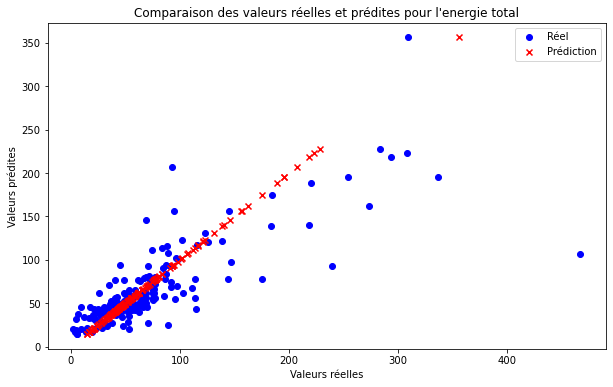

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
               

In [63]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [64]:
model = TransformedTargetRegressor(
    regressor= Ridge(alpha=5.5), func=np.log1p, inverse_func=np.expm1)


Train Mean Squared Error: 3183.873769016865
Train R-squared: 0.40860296321253664
Test Mean Squared Error: 1677.6317293276581
Test R-squared: 0.6200420843637895


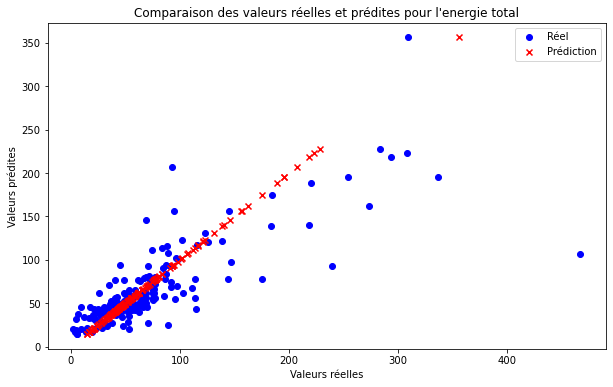

In [65]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

# Ridge sans le Log sur la target

In [66]:
param={'alpha':alpha}
model = Ridge()


cv R-squared 0.14227708504502687
mean_score_time 0.004862833023071289
mean_fit_time 0.009946489334106445
Test Mean Squared Error: 2785.9257049554494
Test R-squared: 0.36903045795608524


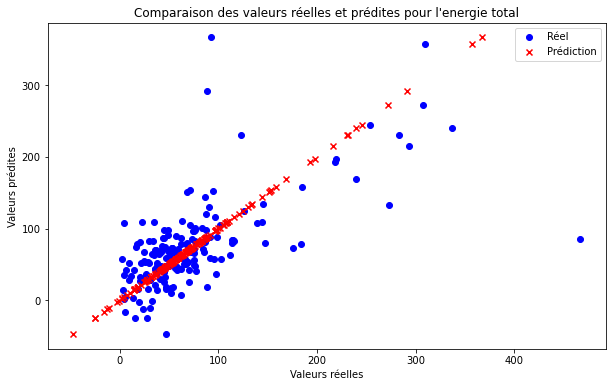

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model', Ridge(alpha=0.1))])

In [67]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

## Entrainer le meilleure model

In [68]:
model = Ridge(alpha=0.1)

Train Mean Squared Error: 2327.0904981535964
Train R-squared: 0.5677484332649091
Test Mean Squared Error: 2785.9257049554494
Test R-squared: 0.36903045795608524


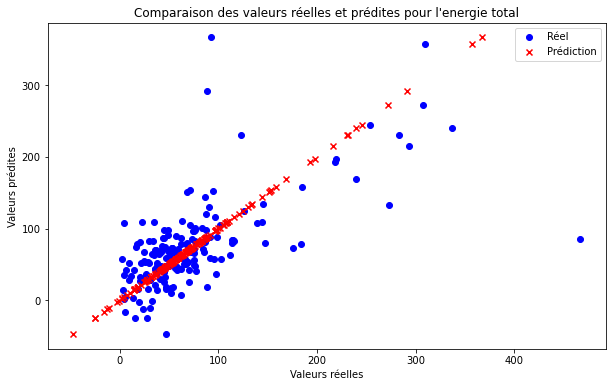

In [69]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

Nous avons de meilleure résultats sur le train mais le modele fait de l'overfitting  
Les modeles ont tous du mal à predire les valeurs extrêmes d'energie 

#  Random forest regressor sans la methode log de la taget

**estimator__n_estimators** : C'est le nombre d'arbres dans un modèle de type RandomForest, où chaque arbre est construit sur un sous-ensemble aléatoire des données d'entraînement. Un nombre plus élevé d'arbres peut généralement conduire à de meilleures performances, mais cela augmente également le temps de calcul.

**estimator__max_depth** : C'est la profondeur maximale de chaque arbre dans le modèle RandomForest. Une profondeur plus élevée peut permettre au modèle d'apprendre des relations plus complexes dans les données, mais cela peut également le rendre plus susceptible de surapprendre (overfitting) aux données d'entraînement.

**estimator__min_samples_split** : C'est le nombre minimum d'échantillons requis pour diviser un nœud interne dans l'arbre RandomForest. Ce paramètre contrôle la taille minimale d'un groupe d'échantillons qui peut être divisé en sous-groupes plus petits.

**estimator__min_samples_leaf** : C'est le nombre minimum d'échantillons requis pour être à une feuille de l'arbre RandomForest. Ce paramètre contrôle la taille minimale des feuilles de l'arbre, empêchant ainsi la création de feuilles avec très peu d'échantillons.

In [70]:
model = RandomForestRegressor()


In [71]:
# dict de parametre a tester
param_grid = {
    'model__n_estimators': [10, 50],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2, 4]
}


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

cv R-squared 0.6276078703549282
mean_score_time 0.004301214218139648
mean_fit_time 0.037074613571166995
Test Mean Squared Error: 1413.7183518548788
Test R-squared: 0.6798144259689742


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


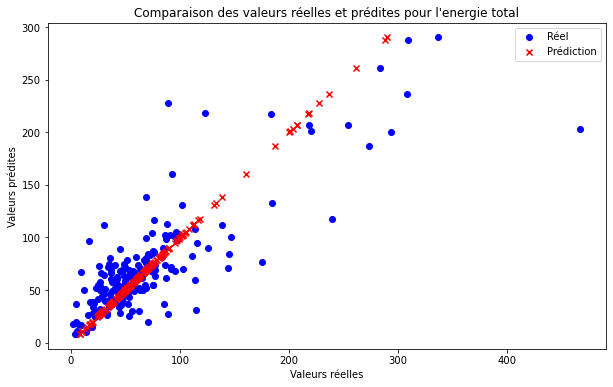

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 RandomForestRegressor(min_samples_leaf=2, n_estimators=10))])

In [72]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

## Entrainement du meilleure model

In [73]:
model = RandomForestRegressor(min_samples_leaf=2, n_estimators=10)


Train Mean Squared Error: 778.1999703490017
Train R-squared: 0.8554511925155242
Test Mean Squared Error: 1247.428568164755
Test R-squared: 0.7174765174148827


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


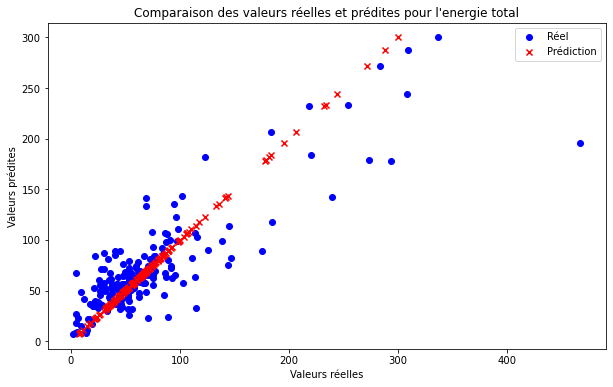

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 RandomForestRegressor(min_samples_leaf=2, n_estimators=10))])

In [74]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

#  Random forest regressor avec la methode log de la taget

In [75]:
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(), func=np.log1p, inverse_func=np.expm1
)

In [76]:
# dict de parametre a tester
param_grid = {
    'model__regressor__n_estimators': [10, 20],
    'model__regressor__max_depth': [None, 10,20],
    'model__regressor__min_samples_split': [2, 5],
    'model__regressor__min_samples_leaf': [1, 2]
}


cv R-squared 0.5852069242194249
mean_score_time 0.0043528079986572266
mean_fit_time 0.04262857437133789
Test Mean Squared Error: 1200.3560502575679
Test R-squared: 0.7281377224189934


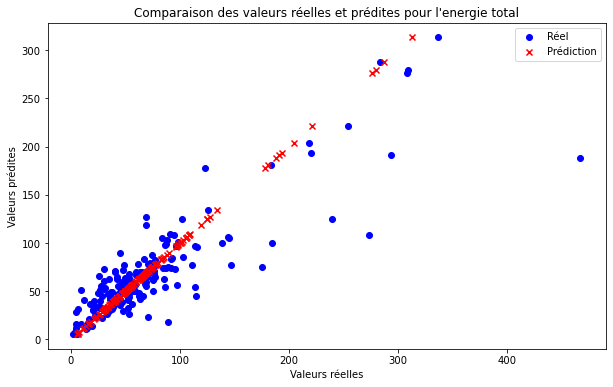

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
               

In [77]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

### Entrainement du meilleure model

In [78]:
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(max_depth=20,
                                   n_estimators=10), func=np.log1p, inverse_func=np.expm1)



Train Mean Squared Error: 498.3862767699941
Train R-squared: 0.9074259255735745
Test Mean Squared Error: 1338.597779254299
Test R-squared: 0.6968280861708791


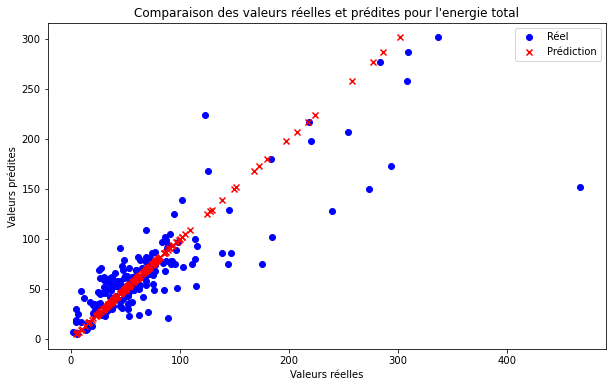

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'YearBuilt'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
               

In [79]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

# 3.Features ENGINEERING 

## Créer de nouvelles variables

In [80]:
data.head()

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,steam_elec_gaz
0,Hotel,DOWNTOWN,1927,12,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,1276453.0,249.98,7226362.00
1,Hotel,DOWNTOWN,1996,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,97.900002,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,5145082.0,295.86,8387933.00
2,Hotel,DOWNTOWN,1969,41,956110,196718,759392,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,1493800.0,2089.28,72587018.00
3,Hotel,DOWNTOWN,1926,10,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,1811213.0,286.43,6794583.25
5,Hotel,DOWNTOWN,1926,11,83008,0,83008,Hotel,81352.0,NaN,NaN,NaN,NaN,27.0,70.800003,74.500000,5758795.0,6062767.5,0.00,8.239199e+05,2811215.0,2947580.0,176.14,5758795.00


### Pourcentage de consommation d'énergie

In [81]:
data['perc-elec_use'] = data['Electricity(kBtu)']/ data['steam_elec_gaz']

In [82]:
data['perc-gaz_use'] = data['NaturalGas(kBtu)']/ data['steam_elec_gaz']

In [83]:
data['perc-steam_use'] = data['SteamUse(kBtu)']/ data['steam_elec_gaz']

In [84]:
data.head()

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,steam_elec_gaz,perc-elec_use,perc-gaz_use,perc-steam_use
0,Hotel,DOWNTOWN,1927,12,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,1276453.0,249.98,7226362.00,0.546060,0.176638,0.277302
1,Hotel,DOWNTOWN,1996,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,97.900002,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,5145082.0,295.86,8387933.00,0.386609,0.613391,0.000000
2,Hotel,DOWNTOWN,1969,41,956110,196718,759392,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,1493800.0,2089.28,72587018.00,0.682307,0.020579,0.297113
3,Hotel,DOWNTOWN,1926,10,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,1811213.0,286.43,6794583.25,0.407519,0.266567,0.325913
5,Hotel,DOWNTOWN,1926,11,83008,0,83008,Hotel,81352.0,NaN,NaN,NaN,NaN,27.0,70.800003,74.500000,5758795.0,6062767.5,0.00,8.239199e+05,2811215.0,2947580.0,176.14,5758795.00,0.488160,0.511840,0.000000


In [85]:
data.shape

(922, 27)

## Observer les batiments qui ne consomment rien

In [91]:
colonnes = ['TotalGHGEmissions','SiteEnergyUse(kBtu)','steam_elec_gaz','SiteEUIWN(kBtu/sf)']

In [92]:
# Créer un masque booléen pour les lignes où les colonnes ciblées sont égales à zéro
masque = (data[colonnes] <= 0).any(axis=1)

In [93]:
masque.value_counts()

False    922
dtype: int64

In [94]:
data.isnull().sum()

PrimaryPropertyType                  0
Neighborhood                         0
YearBuilt                            0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseType               2
LargestPropertyUseTypeGFA            2
SecondLargestPropertyUseType       498
SecondLargestPropertyUseTypeGFA    498
ThirdLargestPropertyUseType        831
ThirdLargestPropertyUseTypeGFA     831
ENERGYSTARScore                      0
SiteEUI(kBtu/sf)                     0
SiteEUIWN(kBtu/sf)                   0
SiteEnergyUse(kBtu)                  0
SiteEnergyUseWN(kBtu)                0
SteamUse(kBtu)                       0
Electricity(kWh)                     0
Electricity(kBtu)                    0
NaturalGas(kBtu)                     0
TotalGHGEmissions                    0
steam_elec_gaz                       0
perc-elec_use                        0
perc-gaz_use             

## Selectionner les features

In [95]:
features = data[['PropertyGFAParking','PropertyGFABuilding(s)','PrimaryPropertyType','ENERGYSTARScore',
              'NumberofFloors','YearBuilt','Neighborhood','perc-elec_use','perc-gaz_use','perc-steam_use']]

### Correlation entre les features et la target

<AxesSubplot:>

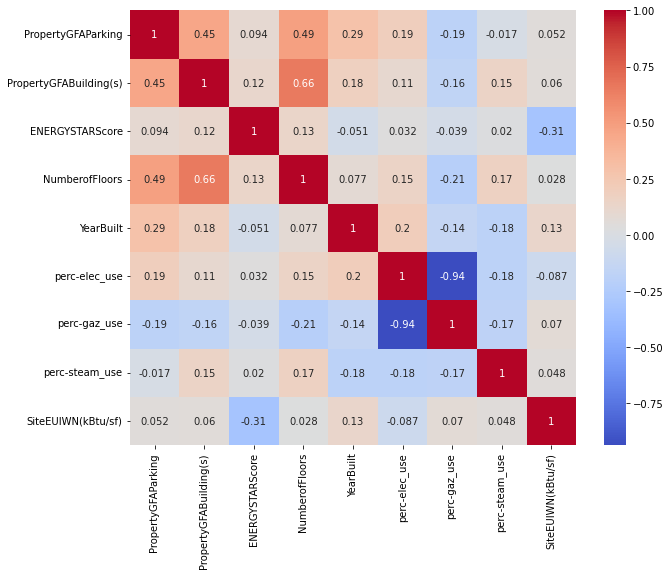

In [96]:
# Calculer la matrice de corrélation
correlation_matrix =  data[['PropertyGFAParking','PropertyGFABuilding(s)','PrimaryPropertyType','ENERGYSTARScore',
              'NumberofFloors','YearBuilt','Neighborhood','perc-elec_use','perc-gaz_use','perc-steam_use',
                                'SiteEUIWN(kBtu/sf)']].corr()

# Créer la heatmap
plt.figure(figsize=(10, 8))  # Définir la taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### Regarder les valeurs nulles

In [97]:
features.isnull().sum()

PropertyGFAParking        0
PropertyGFABuilding(s)    0
PrimaryPropertyType       0
ENERGYSTARScore           0
NumberofFloors            0
YearBuilt                 0
Neighborhood              0
perc-elec_use             0
perc-gaz_use              0
perc-steam_use            0
dtype: int64

In [98]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 1393
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PropertyGFAParking      922 non-null    int64  
 1   PropertyGFABuilding(s)  922 non-null    int64  
 2   PrimaryPropertyType     922 non-null    object 
 3   ENERGYSTARScore         922 non-null    float64
 4   NumberofFloors          922 non-null    int64  
 5   YearBuilt               922 non-null    int64  
 6   Neighborhood            922 non-null    object 
 7   perc-elec_use           922 non-null    float64
 8   perc-gaz_use            922 non-null    float64
 9   perc-steam_use          922 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 79.2+ KB


In [99]:
features.shape

(922, 10)

## Target 

In [100]:
target = data[['SiteEUIWN(kBtu/sf)']]

In [101]:
target.isnull().sum()

SiteEUIWN(kBtu/sf)    0
dtype: int64

#  Les Modeles 

# Lasso avec le log de la target

In [102]:
columns_to_normalize = ['PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore','NumberofFloors','perc-elec_use','perc-gaz_use','perc-steam_use']
columns_to_encode = ['PrimaryPropertyType', 'Neighborhood', 'YearBuilt']

In [103]:
model = TransformedTargetRegressor(
    regressor=Lasso(), func=np.log1p, inverse_func=np.expm1
)

In [104]:
# Créez un dictionnaire des hyperparamètres 
param_grid = {
    'model__regressor__alpha':  [ 0.1, 0.01, 0.001]   # Liste des valeurs d'alpha 

}


cv R-squared 0.39889454580875283
mean_score_time 0.0031440258026123047
mean_fit_time 0.0074859619140625
Test Mean Squared Error: 1636.6602459182648
Test R-squared: 0.6293214984119462


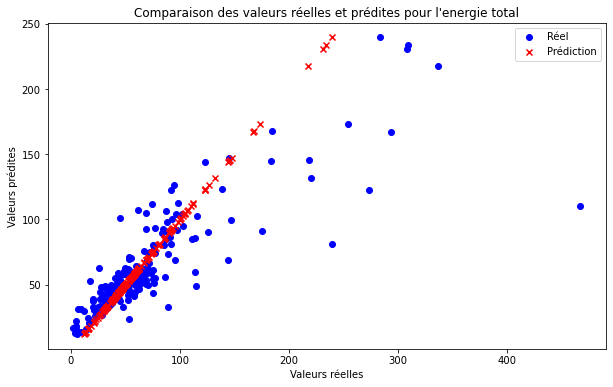

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'ENERGYSTARScore',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [105]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [106]:
model = TransformedTargetRegressor(
    regressor=Lasso(alpha= 0.01), func=np.log1p, inverse_func=np.expm1
)

Train Mean Squared Error: 3509.007469904367
Train R-squared: 0.34821014577870213
Test Mean Squared Error: 1636.6602459182648
Test R-squared: 0.6293214984119462


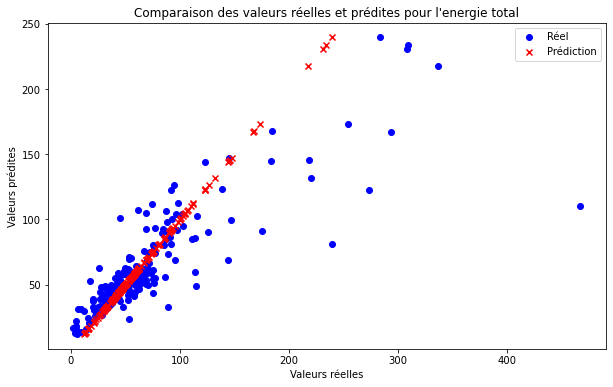

In [107]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

# Lasso Grid search sans le log de la target

In [108]:
model =Lasso()


In [109]:
 alpha = np.arange(0.1, 10, 0.5)

In [110]:
# Créez un dictionnaire des hyperparamètres 
param_grid = {
    'model__alpha':  alpha   # Liste des valeurs d'alpha 

}


cv R-squared 0.3273202104315091
mean_score_time 0.0029113292694091797
mean_fit_time 0.006233692169189453
Test Mean Squared Error: 2075.892499232216
Test R-squared: 0.5298421141514632


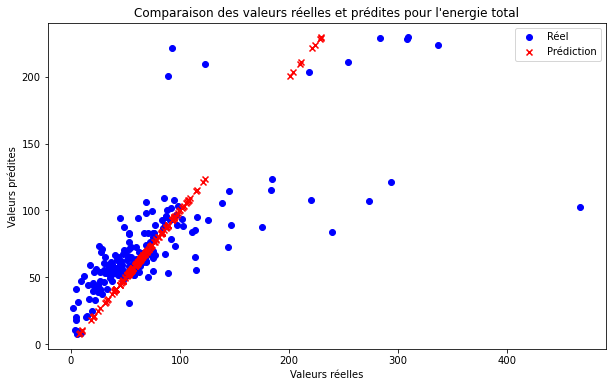

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'ENERGYSTARScore',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [111]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [112]:
model = Lasso(alpha = 1.1)

Train Mean Squared Error: 3054.4886492132077
Train R-squared: 0.4326359437913808
Test Mean Squared Error: 2075.892499232216
Test R-squared: 0.5298421141514632


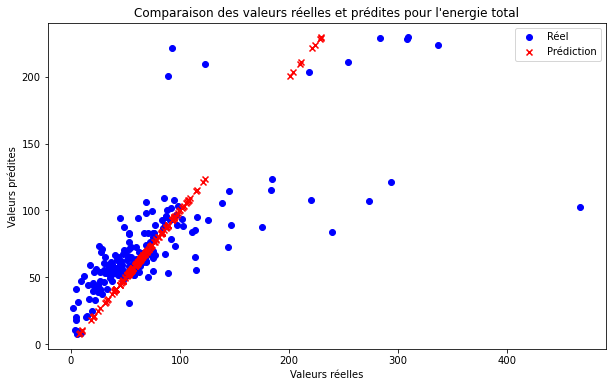

In [113]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

Les deux modeles ont des resultats trés faible

# Observer les valeurs max mal predites

In [114]:
def find_max_ten_error_values(features, target, pipeline):
    # Make predictions on the feature set
    predictions = pipeline.predict(features)
    
    # Convert predictions to a pandas Series
    predictions_series = pd.Series(predictions, index=target.index)
    
    # If target is a DataFrame with one column, convert to Series
    if isinstance(target, pd.DataFrame) and target.shape[1] == 1:
        target = target.squeeze()
    
    # Calculate the errors
    errors = abs(predictions_series - target)
    
    # Find the indices of the top 10 largest errors
    max_error_indices = np.argsort(errors)[-10:][::-1]
    
    # Get the feature values corresponding to the largest errors
    max_error_feature_values = features.iloc[max_error_indices]
    
    # Display the feature values with the largest errors
    print("Max Error Feature Values:")
    return max_error_feature_values

In [115]:
find_max_ten_error_values(features, target, trained_pipeline)

Max Error Feature Values:


,PropertyGFAParking,PropertyGFABuilding(s),PrimaryPropertyType,ENERGYSTARScore,NumberofFloors,YearBuilt,Neighborhood,perc-elec_use,perc-gaz_use,perc-steam_use
161,0,36000,Other,96.0,5,1969,NORTHEAST,1.000000,0.000000,0.0
215,104922,108912,Mixed Use Property,100.0,6,2001,LAKE UNION,0.997915,0.002085,0.0
1355,35120,55559,Other,100.0,7,1975,DOWNTOWN,1.000000,0.000000,0.0
433,0,429405,Other,98.0,33,1981,DOWNTOWN,0.999455,0.000545,0.0
470,0,85126,Small- and Mid-Sized Office,1.0,3,1929,Delridge,0.964492,0.035508,0.0
648,31000,3636,Senior Care Community,3.0,2,1966,BALLARD,0.293148,0.706852,0.0
214,177660,200783,Mixed Use Property,100.0,6,2001,LAKE UNION,0.971554,0.028446,0.0
1086,0,37883,Retail Store,88.0,1,1966,SOUTHEAST,0.431054,0.568946,0.0
553,0,31890,Other,2.0,2,1955,DOWNTOWN,1.000000,0.000000,0.0
1033,0,24377,Supermarket / Grocery Store,6.0,1,1973,NORTHEAST,0.578362,0.421638,0.0


Le modele a du mal à predire les batiments qui ne consomment pas d'énergie de la vapeur(steam use)

# Ridge avec le Log sur la target

In [116]:
columns_to_normalize = ['PropertyGFAParking', 'PropertyGFABuilding(s)', 'NumberofFloors','ENERGYSTARScore','perc-elec_use','perc-gaz_use','perc-steam_use']
columns_to_encode = ['PrimaryPropertyType', 'Neighborhood', 'YearBuilt']

In [117]:
model = TransformedTargetRegressor(
    regressor=Ridge(), func=np.log1p, inverse_func=np.expm1
)

In [118]:
param={'model__regressor__alpha':alpha}


cv R-squared 0.4191118962541228
mean_score_time 0.0031331539154052734
mean_fit_time 0.006611824035644531
Test Mean Squared Error: 1528.4488728811782
Test R-squared: 0.6538297185585584


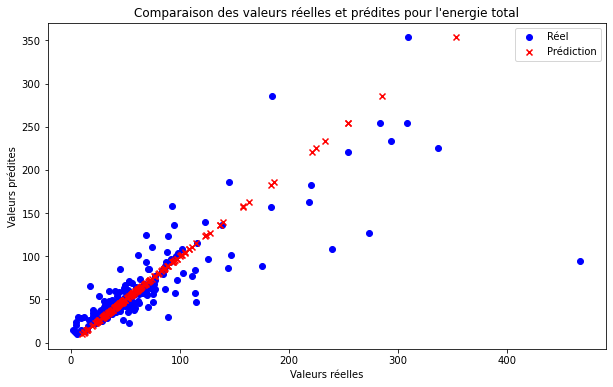

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [119]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [120]:
model = TransformedTargetRegressor(
    regressor= Ridge(alpha=5.6), func=np.log1p, inverse_func=np.expm1)


Train Mean Squared Error: 3062.9394655600954
Train R-squared: 0.43106622460382404
Test Mean Squared Error: 1528.4488728811782
Test R-squared: 0.6538297185585584


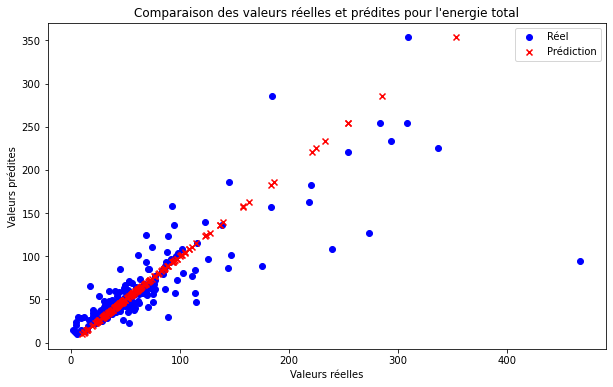

In [121]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

# Ridge sans le Log sur la target

In [122]:
param={'alpha':alpha}
model = Ridge()


cv R-squared 0.409580540946718
mean_score_time 0.003115415573120117
mean_fit_time 0.006617975234985351
Test Mean Squared Error: 1860.140619460205
Test R-squared: 0.578706613492818


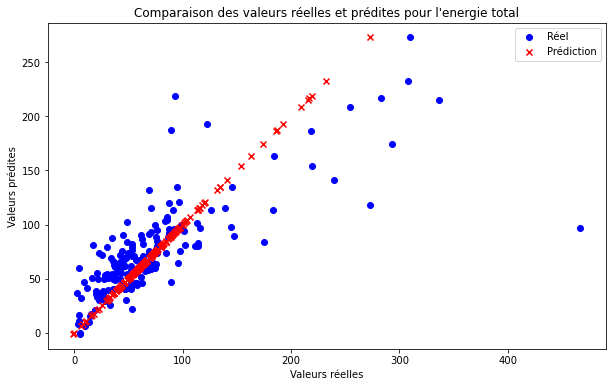

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [123]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

## Entrainer le meilleure model

In [124]:
model = Ridge(alpha=9.1)

Train Mean Squared Error: 2627.0117915332553
Train R-squared: 0.5120387610096035
Test Mean Squared Error: 1860.140619460205
Test R-squared: 0.578706613492818


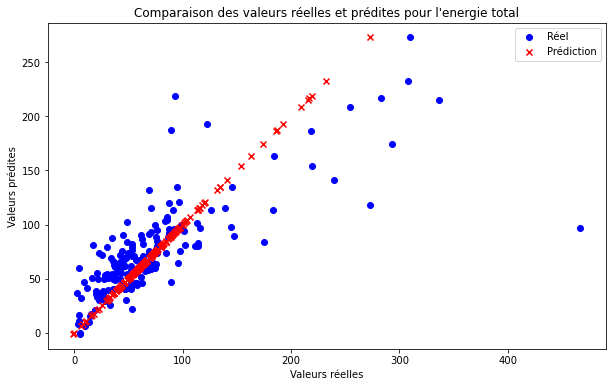

In [125]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

In [126]:
def find_max_ten_error_values_two(features, target, pipeline):
    # Make predictions on the feature set
    predictions = pipeline.predict(features)
    
    # Reshape predictions if they are 2D with one dimension being 1
    if predictions.ndim == 2 and 1 in predictions.shape:
        predictions = predictions.reshape(-1)
    
    # Convert predictions to a pandas Series
    predictions_series = pd.Series(predictions, index=target.index)
    
    # If target is a DataFrame with one column, convert to Series
    if isinstance(target, pd.DataFrame) and target.shape[1] == 1:
        target = target.squeeze()
    
    # Calculate the errors
    errors = abs(predictions_series - target)
    
    # Find the indices of the top 10 largest errors
    max_error_indices = np.argsort(errors)[-10:][::-1]
    
    # Get the feature values corresponding to the largest errors
    max_error_feature_values = features.iloc[max_error_indices]
    
    # Display the feature values with the largest errors
    print("Max Error Feature Values:")
    return max_error_feature_values

In [127]:
find_max_ten_error_values_two(features, target, trained_pipeline)

Max Error Feature Values:


,PropertyGFAParking,PropertyGFABuilding(s),PrimaryPropertyType,ENERGYSTARScore,NumberofFloors,YearBuilt,Neighborhood,perc-elec_use,perc-gaz_use,perc-steam_use
161,0,36000,Other,96.0,5,1969,NORTHEAST,1.000000,0.000000,0.0
215,104922,108912,Mixed Use Property,100.0,6,2001,LAKE UNION,0.997915,0.002085,0.0
1355,35120,55559,Other,100.0,7,1975,DOWNTOWN,1.000000,0.000000,0.0
433,0,429405,Other,98.0,33,1981,DOWNTOWN,0.999455,0.000545,0.0
470,0,85126,Small- and Mid-Sized Office,1.0,3,1929,Delridge,0.964492,0.035508,0.0
648,31000,3636,Senior Care Community,3.0,2,1966,BALLARD,0.293148,0.706852,0.0
214,177660,200783,Mixed Use Property,100.0,6,2001,LAKE UNION,0.971554,0.028446,0.0
504,48510,65434,Large Office,1.0,3,1960,NORTHEAST,0.995049,0.004951,0.0
1086,0,37883,Retail Store,88.0,1,1966,SOUTHEAST,0.431054,0.568946,0.0
1033,0,24377,Supermarket / Grocery Store,6.0,1,1973,NORTHEAST,0.578362,0.421638,0.0


On observe que les modeles ont du mal a predire les propriétés avec un pourcentage de vapeur a 0 % et quelques propiétés sans parking

# Decision tree regressor avec le Log de la target

In [128]:
# defenir le model avec la methode log
model = TransformedTargetRegressor(
    regressor=DecisionTreeRegressor(), func=np.log1p, inverse_func=np.expm1
)

In [129]:
param_grid = {
    'model__regressor__max_depth': [None,10, 20,30],  # Hyperparameter for DecisionTreeRegressor
    'model__regressor__min_samples_split': [2,7, 10],  # Hyperparameter for DecisionTreeRegressor
}

cv R-squared 0.5432885006463878
mean_score_time 0.003586149215698242
mean_fit_time 0.008798933029174805
Test Mean Squared Error: 1430.7926624318359
Test R-squared: 0.6759473558937403


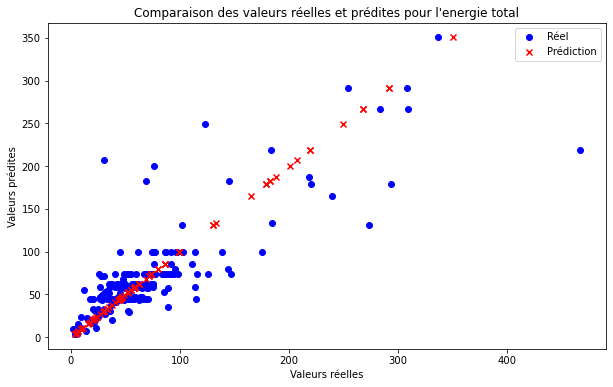

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [130]:
preprocess_and_train_model_grid_search(features, target, model, columns_to_normalize, columns_to_encode,
                               param_grid, test_size=0.2, random_state=42)


## Entrainer le meilleure model

In [131]:
# defenir le model avec la methode log
model =TransformedTargetRegressor(regressor= DecisionTreeRegressor(max_depth =  10), 
                                  func=np.log1p, inverse_func=np.expm1)


Train Mean Squared Error: 332.4500464180648
Train R-squared: 0.9382481886547253
Test Mean Squared Error: 1372.1928313578824
Test R-squared: 0.6892193209396189


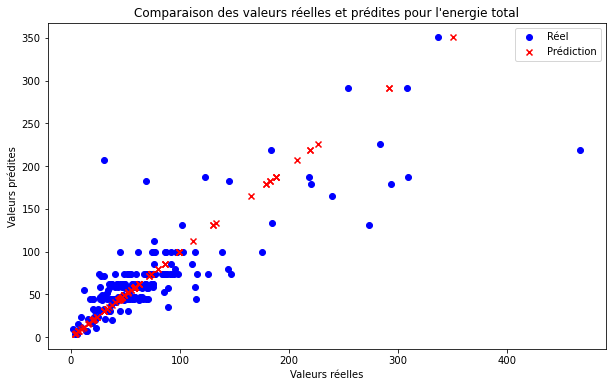

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [132]:
preprocess_and_train_model(features, target,model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

# Decision tree regressor sans le Log de la target

In [133]:
# defenir le model avec la methode log
model =DecisionTreeRegressor()


In [134]:
param_grid = {
    'model__max_depth': [None,10, 20],  # Hyperparameter for DecisionTreeRegressor
    'model__min_samples_split': [2,7, 10],  # Hyperparameter for DecisionTreeRegressor
}

cv R-squared 0.5894175562496008
mean_score_time 0.0031520843505859373
mean_fit_time 0.007431459426879883
Test Mean Squared Error: 1591.1579977245722
Test R-squared: 0.6396270613541576


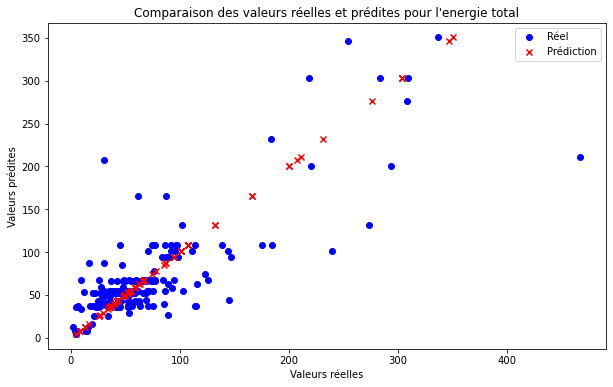

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [135]:
preprocess_and_train_model_grid_search(features, target, model, columns_to_normalize, columns_to_encode,
                               param_grid, test_size=0.2, random_state=42)


## Entrainer le meilleure model

In [136]:
# defenir le model avec la methode log
model = DecisionTreeRegressor(max_depth =10)
                                 


Train Mean Squared Error: 246.3827283321086
Train R-squared: 0.9542349898198971
Test Mean Squared Error: 1577.011118991004
Test R-squared: 0.6428311129123139


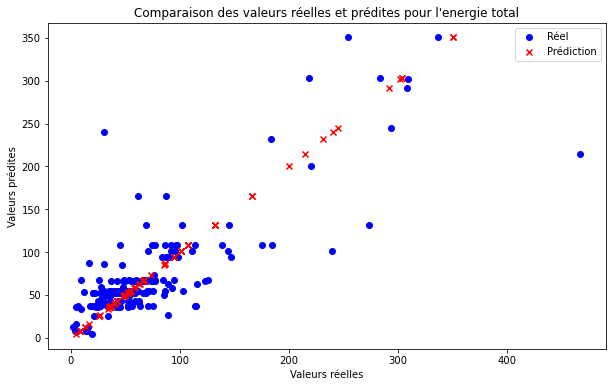

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [137]:
preprocess_and_train_model(features, target,model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

Les resultats de DTR ne sont pas trés bon,  il ya clairement une tres grande difference entre l'entrainement et le test et donc le model c'est trop ajuster au données de train et n'arrive pas s'adapter au nouvelle données (overfitting) pour la methode sans le log de la target


#  Random forest regressor sans la methode log de la taget

**estimator__n_estimators** : C'est le nombre d'arbres dans un modèle de type RandomForest, où chaque arbre est construit sur un sous-ensemble aléatoire des données d'entraînement. Un nombre plus élevé d'arbres peut généralement conduire à de meilleures performances, mais cela augmente également le temps de calcul.

**estimator__max_depth** : C'est la profondeur maximale de chaque arbre dans le modèle RandomForest. Une profondeur plus élevée peut permettre au modèle d'apprendre des relations plus complexes dans les données, mais cela peut également le rendre plus susceptible de surapprendre (overfitting) aux données d'entraînement.

**estimator__min_samples_split** : C'est le nombre minimum d'échantillons requis pour diviser un nœud interne dans l'arbre RandomForest. Ce paramètre contrôle la taille minimale d'un groupe d'échantillons qui peut être divisé en sous-groupes plus petits.

**estimator__min_samples_leaf** : C'est le nombre minimum d'échantillons requis pour être à une feuille de l'arbre RandomForest. Ce paramètre contrôle la taille minimale des feuilles de l'arbre, empêchant ainsi la création de feuilles avec très peu d'échantillons.

In [138]:
model = RandomForestRegressor()


In [139]:
# dict de parametre a tester
param_grid = {
    'model__n_estimators': [10, 50],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [2, 5, 6]
}


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

cv R-squared 0.6050179289437138
mean_score_time 0.0048675537109375
mean_fit_time 0.04655823707580566
Test Mean Squared Error: 1202.5429988632122
Test R-squared: 0.7276424120244188


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


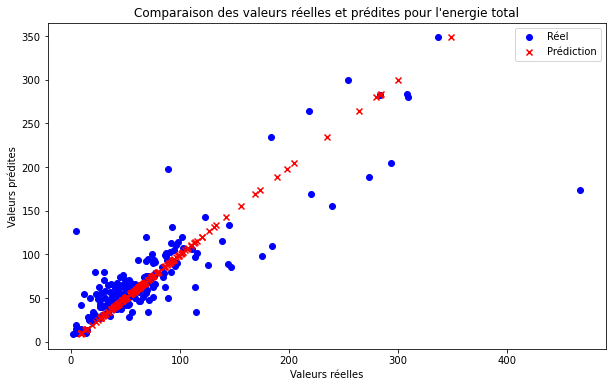

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [140]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

## Entrainement du meilleure model

In [141]:
model = RandomForestRegressor(max_depth= 30, min_samples_leaf=2,
                                       min_samples_split=10)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Train Mean Squared Error: 1880.2186131640403
Train R-squared: 0.6507538310222634
Test Mean Squared Error: 1649.514378587474
Test R-squared: 0.6264102340558164


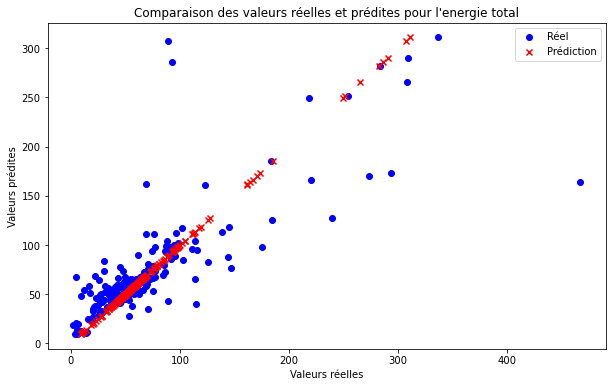

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [142]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

#  Random forest regressor avec la methode log de la taget

In [143]:
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(), func=np.log1p, inverse_func=np.expm1
)

In [145]:
# dict de parametre a tester
param_grid = {
    'model__regressor__n_estimators': [10,20],
    'model__regressor__max_depth': [None, 10,20],
    'model__regressor__min_samples_split': [5, 10],
    'model__regressor__min_samples_leaf': [2,5,6]
}


cv R-squared 0.5360053648377037
mean_score_time 0.00511636734008789
mean_fit_time 0.04225010871887207
Test Mean Squared Error: 1066.679038960091
Test R-squared: 0.7584135199573621


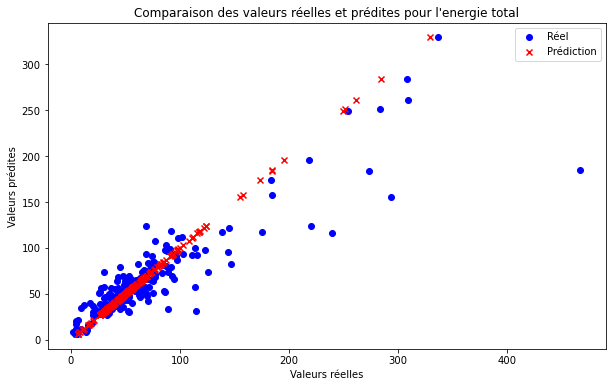

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [146]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

### Entrainement du meilleure model

In [147]:
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(n_estimators=10,min_samples_leaf=2,min_samples_split=5), func=np.log1p, inverse_func=np.expm1)



Train Mean Squared Error: 2210.5185911810217
Train R-squared: 0.5894013898070689
Test Mean Squared Error: 1194.5044497825127
Test R-squared: 0.7294630203856269


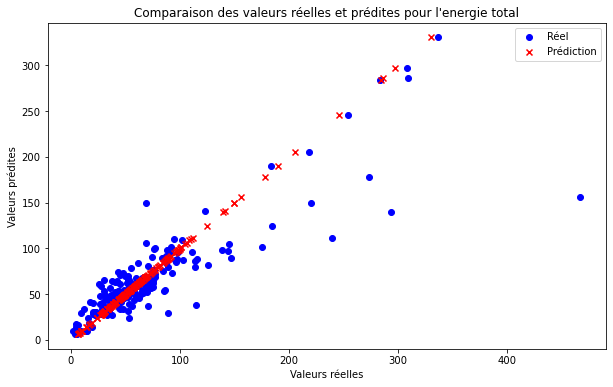

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [148]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

In [150]:
def preprocess_and_train_model_random_forest(features, target, model, columns_to_normalize,columns_to_encode,test_size=0.2, random_state=42):

     #Créer les transformateurs pour la normalisation et l'encodage
    transformateurs =ColumnTransformer ([
    ('normalisation', StandardScaler(), columns_to_normalize),
    ('encodage', OneHotEncoder(handle_unknown='ignore'), columns_to_encode)
    ])

            # Utiliser RandomForestRegressor comme modèle
    model = RandomForestRegressor(random_state=random_state)

    # Créer la pipeline avec le préprocesseur et le modèle
    pipeline = Pipeline([("preprocess", transformateurs), ("model", model)])


    # Séparer les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=random_state,
                                                        stratify=pd.qcut(target.squeeze(), 4))

    pipeline.fit(X_train, y_train)

    # Faire des prédictions sur l'ensemble d'entraînement et l'ensemble de test
    predictions_train = pipeline.predict(X_train)
    predictions_test = pipeline.predict(X_test)
    
    # Get the feature importances from the model
    feature_importances = pipeline.named_steps['model'].feature_importances_
    
    feature_importance_pairs = list(zip(columns_to_normalize + columns_to_encode, feature_importances))

    # Triez la liste par ordre décroissant d'importance
    sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
    
    # Affichez les caractéristiques triées par ordre d'importance
    print("Feature Importances:")
    for feature, importance in sorted_feature_importance_pairs:
        print(f"{feature}: {importance}")

    # Calculer les métriques pour l'ensemble d'entraînement
    mse_train = mean_squared_error(y_train, predictions_train)
    r2_train = r2_score(y_train, predictions_train)

    # Calculer les métriques pour l'ensemble de test
    mse_test = mean_squared_error(y_test, predictions_test)
    r2_test = r2_score(y_test, predictions_test)
    
    feature_importances = pipeline.named_steps['model'].feature_importances_

    # Afficher les métriques pour l'ensemble d'entraînement
    print("Train Mean Squared Error:", mse_train)
    print("Train R-squared:", r2_train)

    # Afficher les métriques pour l'ensemble de test
    print("Test Mean Squared Error:", mse_test)
    print("Test R-squared:", r2_test)
    

    # Appeler la fonction pour afficher la comparaison entre les valeurs réelles et prédites pour l'ensemble de test
    plot_comparison_energy(y_test, predictions_test)
    


    return pipeline


## Features importance

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Feature Importances:
ENERGYSTARScore: 0.29212206921317097
PropertyGFABuilding(s): 0.06406507821656933
perc-elec_use: 0.04399499849697797
PropertyGFAParking: 0.028603854901511197
perc-gaz_use: 0.02442998216935997
Neighborhood: 0.015919823773973395
NumberofFloors: 0.014983639422724794
PrimaryPropertyType: 0.004875370809107796
perc-steam_use: 0.0009673852877230305
YearBuilt: 0.0004570086879829035
Train Mean Squared Error: 229.71632844901552
Train R-squared: 0.9573307342557136
Test Mean Squared Error: 1105.3879178548455
Test R-squared: 0.7496465512094833


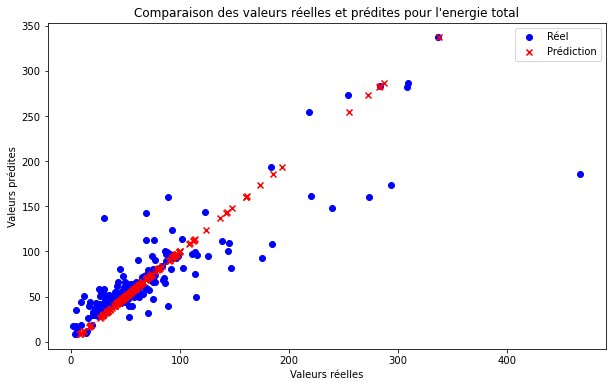

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [151]:
preprocess_and_train_model_random_forest(features, target, model, columns_to_normalize, columns_to_encode,
                                         test_size=0.2, random_state=42)

## Selectionner les features et les target

In [102]:
features = data[['PropertyGFAParking','PropertyGFABuilding(s)','PrimaryPropertyType',
              'NumberofFloors','YearBuilt','Neighborhood','perc-elec_use','perc-gaz_use','perc-steam_use','ENERGYSTARScore']]

In [103]:
target = data[['SiteEUIWN(kBtu/sf)']]

In [104]:
features.isnull().sum()

PropertyGFAParking        0
PropertyGFABuilding(s)    0
PrimaryPropertyType       0
NumberofFloors            0
YearBuilt                 0
Neighborhood              0
perc-elec_use             0
perc-gaz_use              0
perc-steam_use            0
ENERGYSTARScore           0
dtype: int64

In [105]:
target.isnull().sum()

SiteEUIWN(kBtu/sf)    0
dtype: int64

In [106]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 1393
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PropertyGFAParking      922 non-null    int64  
 1   PropertyGFABuilding(s)  922 non-null    int64  
 2   PrimaryPropertyType     922 non-null    object 
 3   NumberofFloors          922 non-null    int64  
 4   YearBuilt               922 non-null    int64  
 5   Neighborhood            922 non-null    object 
 6   perc-elec_use           922 non-null    float64
 7   perc-gaz_use            922 non-null    float64
 8   perc-steam_use          922 non-null    float64
 9   ENERGYSTARScore         922 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 79.2+ KB


## Observer la correlation

<AxesSubplot:>

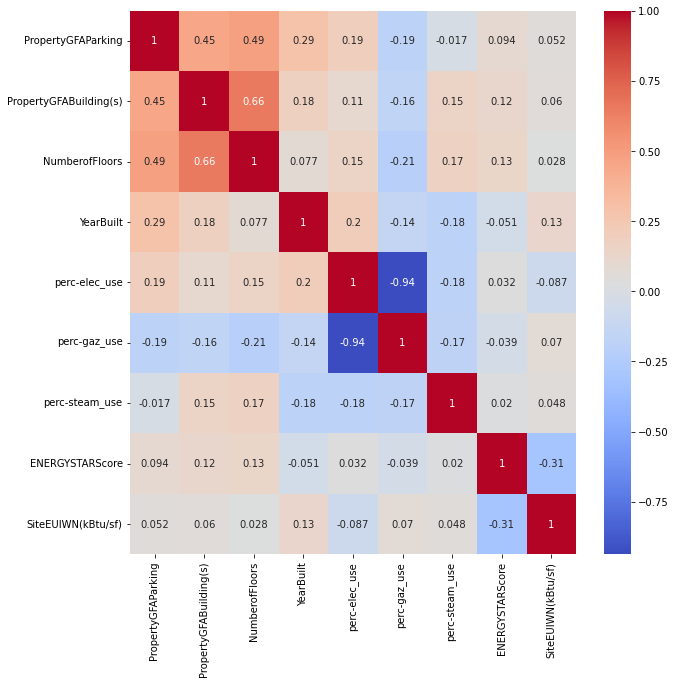

In [108]:
# Calculer la matrice de corrélation
correlation_matrix =  data[['PropertyGFAParking','PropertyGFABuilding(s)','PrimaryPropertyType',
              'NumberofFloors','YearBuilt','Neighborhood','perc-elec_use','perc-gaz_use','perc-steam_use','ENERGYSTARScore',
                                'SiteEUIWN(kBtu/sf)']].corr()

# Créer la heatmap
plt.figure(figsize=(10, 10))  # Définir la taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# . Lasso sans le Log sur les target

In [109]:
columns_to_normalize = ['PropertyGFAParking', 'PropertyGFABuilding(s)', 'NumberofFloors','perc-elec_use','perc-gaz_use',
                        'perc-steam_use','ENERGYSTARScore']
columns_to_encode = ['PrimaryPropertyType', 'Neighborhood', 'YearBuilt']

In [110]:
model =Lasso()


In [111]:
# Créez un dictionnaire des hyperparamètres 
param_grid = {
    'model__alpha':  alpha   # Liste des valeurs d'alpha 

}


cv R-squared 0.3273165664947816
mean_score_time 0.012396669387817383
mean_fit_time 0.031541872024536136
Test Mean Squared Error: 2075.8477713246402
Test R-squared: 0.5298522443381043


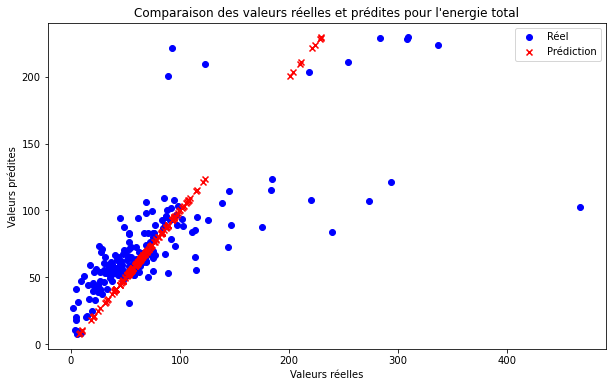

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [112]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [113]:
model= Lasso(alpha= 1.1)

Train Mean Squared Error: 3054.4860355851697
Train R-squared: 0.43263642926661927
Test Mean Squared Error: 2075.8477713246402
Test R-squared: 0.5298522443381043


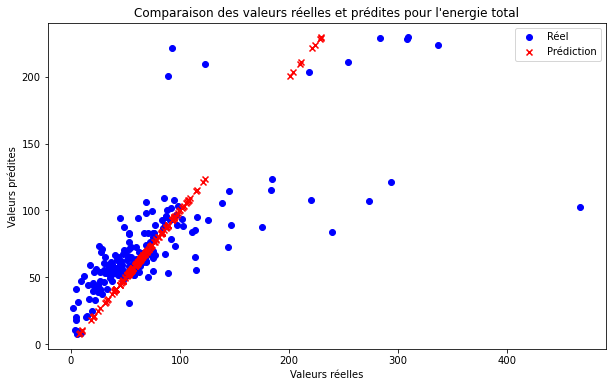

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [114]:
preprocess_and_train_model(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42)

Nous observons une amelioration des réultats du modele Lasso , en plus nous avons des résultats meilleure dans test que les train  
Le modele ne fait plus d'overfitting

# Lasso avec le Log sur les target

In [115]:
model = TransformedTargetRegressor(
    regressor=Lasso(), func=np.log1p, inverse_func=np.expm1
)

In [116]:
# Créez un dictionnaire des hyperparamètres 
param_grid = {
    'model__regressor__alpha':  alpha   # Liste des valeurs d'alpha 

}


cv R-squared 0.06184543913982961
mean_score_time 0.012416791915893555
mean_fit_time 0.02530384063720703
Test Mean Squared Error: 3874.0726123292357
Test R-squared: 0.12258183421824609


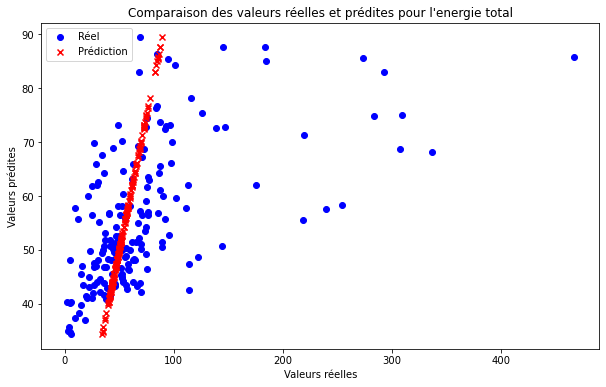

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [117]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [118]:
model= Lasso(alpha= 0.1)

Train Mean Squared Error: 2334.5603579019185
Train R-squared: 0.5663609244499036
Test Mean Squared Error: 2155.130758198901
Test R-squared: 0.5118958609963146


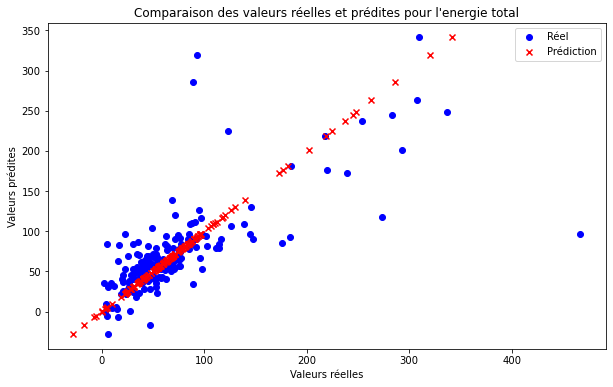

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [119]:
preprocess_and_train_model(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42)

Nous avons de meilleures resultats avec la methode de log sur la target

# . Ridge avec le Log sur la target

In [120]:
model = TransformedTargetRegressor(
    regressor=Ridge(), func=np.log1p, inverse_func=np.expm1
)

In [121]:
param={'model__regressor__alpha':alpha}


cv R-squared 0.4191122059413724
mean_score_time 0.013613319396972657
mean_fit_time 0.03054919242858887
Test Mean Squared Error: 1528.2651953999398
Test R-squared: 0.6538713186974332


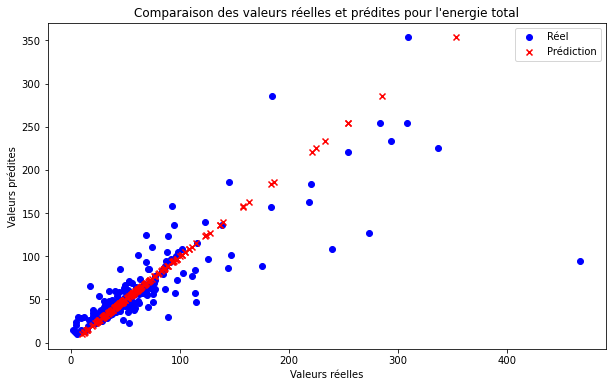

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [122]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [123]:
model = TransformedTargetRegressor(
    regressor= Ridge(alpha=5.6), func=np.log1p, inverse_func=np.expm1)


Train Mean Squared Error: 3062.9320856256054
Train R-squared: 0.43106759540923467
Test Mean Squared Error: 1528.2651953999398
Test R-squared: 0.6538713186974332


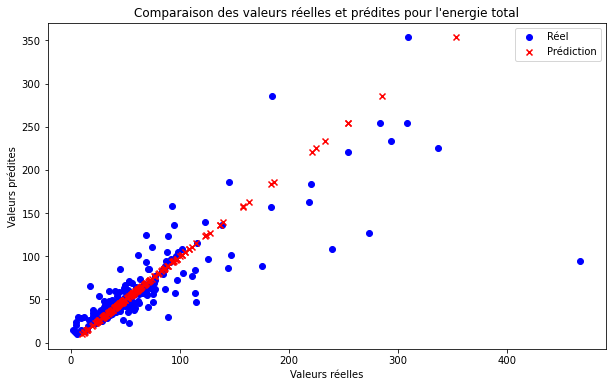

In [124]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

# Ridge sans le log des target

In [125]:
param={'model__alpha':alpha}
model = Ridge()


cv R-squared 0.40960016468370314
mean_score_time 0.013039588928222656
mean_fit_time 0.03043670654296875
Test Mean Squared Error: 1860.1370911907263
Test R-squared: 0.5787074125918656


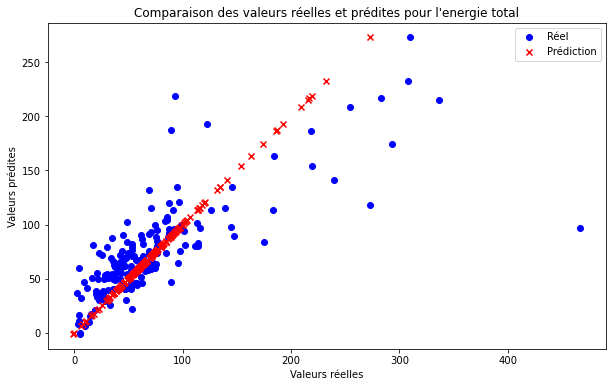

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [126]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param,  test_size=0.2, random_state=42 )

## Entrainer le meilleure model

In [127]:
model = Ridge(alpha=9.1)

Train Mean Squared Error: 2627.011835284262
Train R-squared: 0.5120387528829573
Test Mean Squared Error: 1860.1370911907263
Test R-squared: 0.5787074125918656


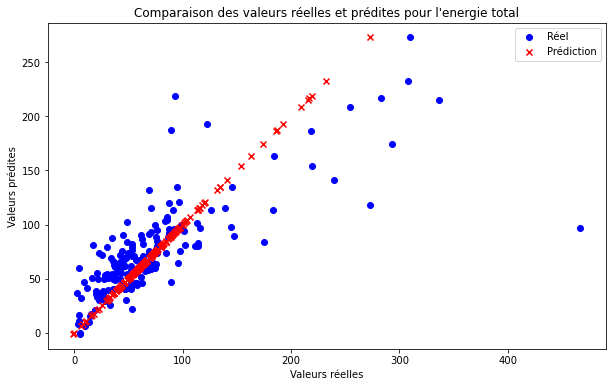

In [128]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

Une amelioration pour le modele Ridge et l'abssence d'overfitting aprés la création de nouvelles variables  
mais le modele fait moins d'overfitting sans le log

# .Random forest regressor avec la methode log de la taget

In [207]:
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(), func=np.log1p, inverse_func=np.expm1
)

In [208]:
# dict de parametre a tester
param_grid = {
    'model__regressor__n_estimators': [10, 20,50],
    'model__regressor__max_depth': [None, 10,20,30],
    'model__regressor__min_samples_split': [2, 5, 10],
    'model__regressor__min_samples_leaf': [1, 2, 3,6]
}


cv R-squared 0.6136680151012633
mean_score_time 0.0018134117126464844
mean_fit_time 0.12277793884277344
Test Mean Squared Error: 1207.4320837395553
Test R-squared: 0.7265351091125167


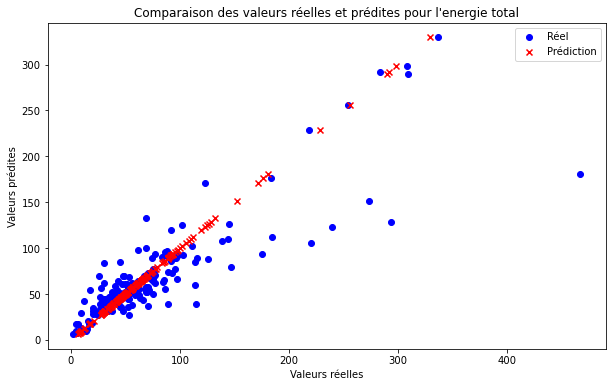

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [209]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

### Entrainement du meilleure model

In [210]:
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(n_estimators=20,max_depth=20), func=np.log1p, inverse_func=np.expm1)



Train Mean Squared Error: 795.5835105522214
Train R-squared: 0.8522222409581154
Test Mean Squared Error: 1103.2961495143022
Test R-squared: 0.7501203047304573


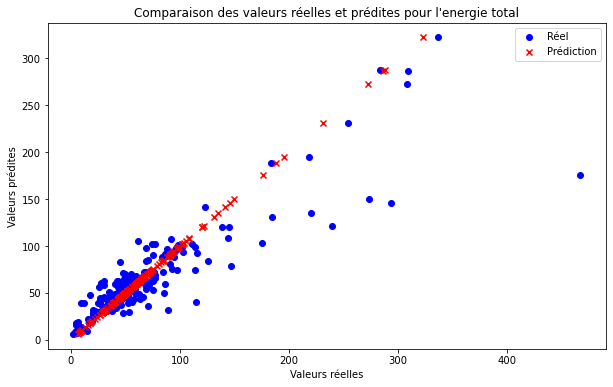

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [211]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

# Random forest regressor sans la methode log de la taget

In [218]:
model =RandomForestRegressor()

In [219]:
# dict de parametre a tester
param_grid = {
    'model__n_estimators': [10, 50,100],
    'model__max_depth': [None, 10, 20,30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 6]
}



A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

cv R-squared 0.6453311261855768
mean_score_time 0.009475374221801757
mean_fit_time 0.20549139976501465
Test Mean Squared Error: 1135.0718560389735
Test R-squared: 0.7429235934332641


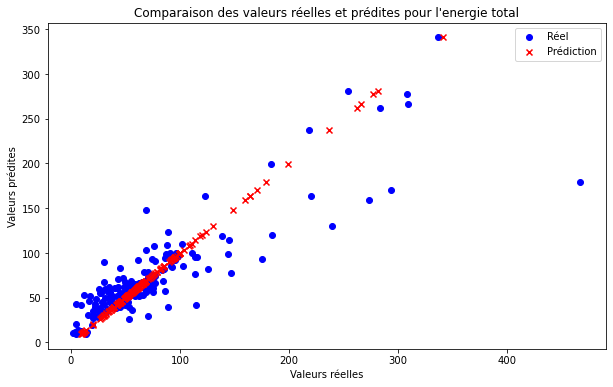

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [220]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42 )

### Entrainement du meilleure model

In [221]:
model =RandomForestRegressor(n_estimators=50,min_samples_leaf=2)



A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Train Mean Squared Error: 581.1818917046926
Train R-squared: 0.8920468355456127
Test Mean Squared Error: 1132.316577696634
Test R-squared: 0.7435476218166404


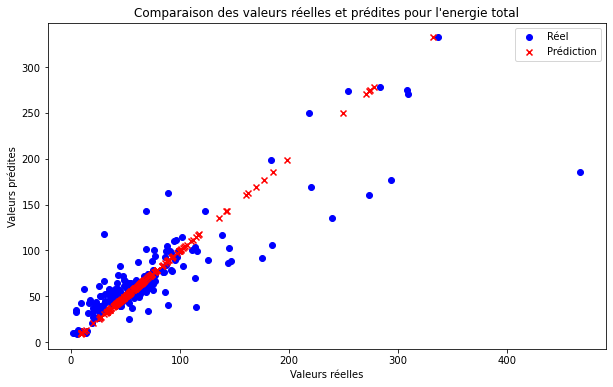

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'ENERGYSTARScore']),
                                                 ('encodage',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                              

In [222]:
preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42  )

La methode log fonctionne trés bien avec le random forest, amis le temps d'entrainement est trés long avec le random forest  
regressor

# Features importance Globale

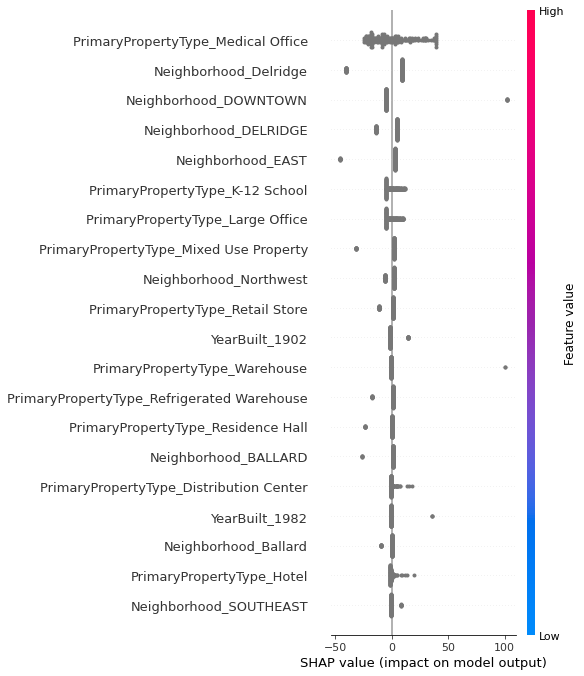

In [223]:
def plot_feature_importance_shap(pipeline, X):
    # Obtenir le transformateur de prétraitement et le modèle du pipeline
    transformateurs, model = pipeline.named_steps["preprocess"], pipeline.named_steps["model"]
    # Extraire le modèle Ridge du TransformedTargetRegressor
    
    # Obtenir les noms des colonnes après encodage en utilisant le ColumnTransformer
    encoded_column_names = transformateurs.transformers_[1][1].get_feature_names_out(input_features=columns_to_encode)
    
    # Transformer les données d'entrée en données encodées
    transformed_X = transformateurs.transform(X)
    
    # Créer un objet explainer SHAP
    explainer = shap.Explainer(model, transformed_X)
    
    # Calculer les valeurs SHAP
    shap_values = explainer(transformed_X)
    
    # Résumer les valeurs SHAP
    shap.summary_plot(shap_values, feature_names=encoded_column_names)
    plt.show()


# Assurez-vous que X_test est défini dans votre environnement
# Appeler la nouvelle fonction pour afficher les importances des caractéristiques avec SHAP
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

plot_feature_importance_shap(trained_pipeline, X_test)


In [224]:
def plot_global_feature_importance_shap_two(pipeline, X_train):
    # Obtenir le transformateur de prétraitement et le modèle du pipeline
    transformateurs, model = pipeline.named_steps["preprocess"], pipeline.named_steps["model"]
    
    # Obtenir les noms des colonnes après encodage en utilisant le ColumnTransformer
    encoded_column_names = transformateurs.transformers_[1][1].get_feature_names_out(input_features=columns_to_encode)
    
    # Transformer les données d'entrée en données encodées
    transformed_X_train = transformateurs.transform(X_train)
    
    # Créer un objet explainer SHAP
    explainer = shap.Explainer(model, transformed_X_train)
    
    # Calculer les valeurs SHAP pour un exemple spécifique
    shap_values = explainer.shap_values(transformed_X_train)
    
    # Résumer les valeurs SHAP pour l'exemple spécifique
    shap.summary_plot(shap_values, feature_names=encoded_column_names, plot_type="bar")
    plt.show()

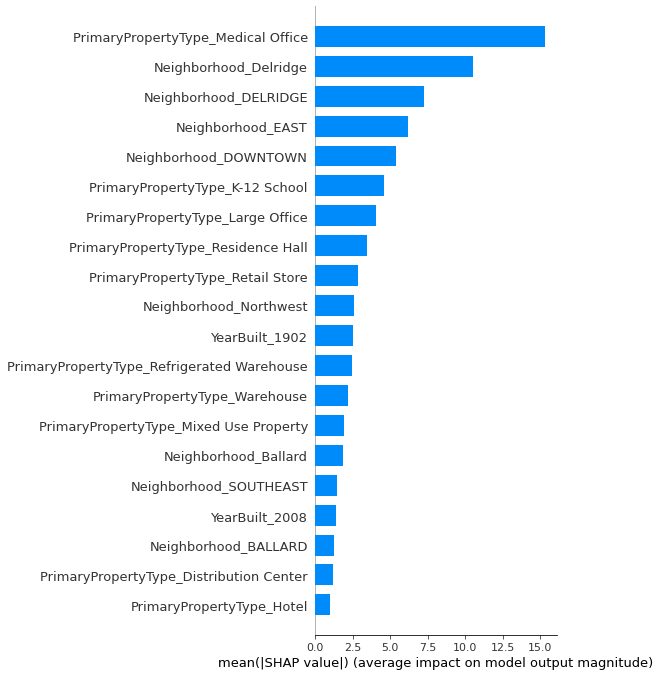

In [225]:
plot_global_feature_importance_shap_two(trained_pipeline, X_train)

# Les colonnes superficies 

Transformer les valeurs des colonnes proprety_type_use  en colonne et    
leurs surface en pourcentage par rapport au tota de la surface 

In [152]:
data.columns

Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'steam_elec_gaz', 'perc-elec_use', 'perc-gaz_use',
       'perc-steam_use'],
      dtype='object')

In [153]:
data[['LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA']].head(10)

,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
0,Hotel,88434.0,NaN,NaN,NaN,NaN
1,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0
2,Hotel,756493.0,NaN,NaN,NaN,NaN
3,Hotel,61320.0,NaN,NaN,NaN,NaN
5,Hotel,81352.0,NaN,NaN,NaN,NaN
7,Hotel,163984.0,NaN,NaN,NaN,NaN
8,Hotel,133884.0,NaN,NaN,NaN,NaN
9,Hotel,336640.0,NaN,NaN,NaN,NaN
10,Hotel,65009.0,NaN,NaN,NaN,NaN
11,Hotel,295511.0,Parking,57600.0,NaN,NaN


In [154]:
data['LargestPropertyUseType'].value_counts()

Office                                   355
Non-Refrigerated Warehouse               139
Retail Store                              71
Hotel                                     65
Worship Facility                          61
K-12 School                               45
Distribution Center                       41
Supermarket/Grocery Store                 36
Medical Office                            35
Residence Hall/Dormitory                  19
Senior Care Community                     17
Hospital (General Medical & Surgical)     10
Refrigerated Warehouse                     5
Parking                                    4
Bank Branch                                4
Financial Office                           4
Multifamily Housing                        3
Data Center                                3
Courthouse                                 1
Wholesale Club/Supercenter                 1
Other                                      1
Name: LargestPropertyUseType, dtype: int64

In [155]:
data['SecondLargestPropertyUseType'].value_counts()

Parking                                  228
Office                                    66
Retail Store                              41
Other                                     17
Non-Refrigerated Warehouse                15
Restaurant                                11
Bank Branch                                6
Supermarket/Grocery Store                  5
Data Center                                4
Distribution Center                        3
Laboratory                                 3
Hotel                                      3
Multifamily Housing                        3
K-12 School                                2
Worship Facility                           2
Swimming Pool                              2
Financial Office                           1
Manufacturing/Industrial Plant             1
Medical Office                             1
Pre-school/Daycare                         1
Performing Arts                            1
College/University                         1
Convenienc

In [156]:
data['ThirdLargestPropertyUseType'].value_counts()

Parking                                  19
Other                                    15
Retail Store                             12
Restaurant                                7
Data Center                               6
Office                                    5
Food Service                              4
Fitness Center/Health Club/Gym            3
Other - Restaurant/Bar                    3
Other - Technology/Science                2
Bank Branch                               2
Financial Office                          2
Non-Refrigerated Warehouse                2
Medical Office                            2
Pre-school/Daycare                        1
Social/Meeting Hall                       1
Other - Entertainment/Public Assembly     1
Other - Recreation                        1
Other - Services                          1
Refrigerated Warehouse                    1
Multifamily Housing                       1
Name: ThirdLargestPropertyUseType, dtype: int64

In [157]:
# Créez un ensemble (set) de PropertyUseType uniques à partir de toutes les colonnes
all_property_types = set(data['LargestPropertyUseType'].unique()).union(
                    set(data['SecondLargestPropertyUseType'].unique())).union(
                    set(data['ThirdLargestPropertyUseType'].unique()))

In [158]:
all_property_types

{'Bank Branch',
 'College/University',
 'Convenience Store without Gas Station',
 'Courthouse',
 'Data Center',
 'Distribution Center',
 'Financial Office',
 'Fitness Center/Health Club/Gym',
 'Food Service',
 'Hospital (General Medical & Surgical)',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Manufacturing/Industrial Plant',
 'Medical Office',
 'Multifamily Housing',
 'Non-Refrigerated Warehouse',
 'Office',
 'Other',
 'Other - Education',
 'Other - Entertainment/Public Assembly',
 'Other - Recreation',
 'Other - Restaurant/Bar',
 'Other - Services',
 'Other - Technology/Science',
 'Parking',
 'Performing Arts',
 'Pre-school/Daycare',
 'Refrigerated Warehouse',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'Self-Storage Facility',
 'Senior Care Community',
 'Social/Meeting Hall',
 'Supermarket/Grocery Store',
 'Swimming Pool',
 'Wholesale Club/Supercenter',
 'Worship Facility',
 nan}

In [159]:
data['PropertyGFATotal'].describe()

count    9.220000e+02
mean     1.159316e+05
std      1.898070e+05
min      1.630000e+04
25%      3.038325e+04
50%      5.113400e+04
75%      1.123970e+05
max      1.952220e+06
Name: PropertyGFATotal, dtype: float64

Vérifier si cette colonne ne pas contient pas de zero , car nous allons deviser les surface par cette colonne

In [160]:
def encode_proprety_use_type(row,property_type):

    if str(row['LargestPropertyUseType']) == property_type :
         return row['LargestPropertyUseTypeGFA']
    else : 
        if str(row['SecondLargestPropertyUseType']) == property_type :
            return row['SecondLargestPropertyUseTypeGFA']
        else :
            if str(row['ThirdLargestPropertyUseType']) == property_type :
                return row['ThirdLargestPropertyUseTypeGFA']
            else:
                return 0.0

    

In [161]:
# Parcourez chaque PropertyUseType unique et créez une colonne correspondante
for property_type in all_property_types:
    # Créez une nouvelle colonne avec le nom de PropertyUseType
    new_column_name = str(property_type) + '_GFA'
    # Utilisez .apply() pour remplir la colonne avec les valeurs de PropertyUseTypeGFA
    data[new_column_name] = data.apply(encode_proprety_use_type, axis = 1, property_type = property_type)
           # Diviser la valeur de la nouvelle colonne par 'totalGFA'
    data[new_column_name] = data[new_column_name] / data['PropertyGFATotal']

In [162]:
data.describe()

,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,steam_elec_gaz,perc-elec_use,perc-gaz_use,perc-steam_use,nan_GFA,Swimming Pool_GFA,Refrigerated Warehouse_GFA,Parking_GFA,Data Center_GFA,Wholesale Club/Supercenter_GFA,Other - Restaurant/Bar_GFA,K-12 School_GFA,Pre-school/Daycare_GFA,Social/Meeting Hall_GFA,Residence Hall/Dormitory_GFA,Supermarket/Grocery Store_GFA,Courthouse_GFA,Laboratory_GFA,Fitness Center/Health Club/Gym_GFA,Other - Services_GFA,Other_GFA,Convenience Store without Gas Station_GFA,Financial Office_GFA,Worship Facility_GFA,Senior Care Community_GFA,Self-Storage Facility_GFA,Other - Education_GFA,Restaurant_GFA,Non-Refrigerated Warehouse_GFA,Bank Branch_GFA,Office_GFA,Medical Office_GFA,Other - Recreation_GFA,Other - Entertainment/Public Assembly_GFA,Manufacturing/Industrial Plant_GFA,College/University_GFA,Performing Arts_GFA,Retail Store_GFA,Food Service_GFA,Other - Technology/Science_GFA,Multifamily Housing_GFA,Hospital (General Medical & Surgical)_GFA,Distribution Center_GFA,Hotel_GFA
count,922.000000,922.000000,9.220000e+02,922.000000,9.220000e+02,9.200000e+02,424.000000,91.000000,922.000000,922.000000,922.000000,9.220000e+02,9.220000e+02,9.220000e+02,9.220000e+02,9.220000e+02,9.220000e+02,922.000000,9.220000e+02,922.000000,922.000000,922.000000,922.0,922.0,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,1962.261388,4.658351,1.159316e+05,14247.558568,1.016841e+05,9.499743e+04,36800.522870,18537.450549,63.052061,68.295553,70.982321,7.725423e+06,7.904348e+06,5.973503e+05,1.615053e+06,5.510561e+06,1.595918e+06,169.283688,7.703829e+06,0.717330,0.260347,0.022323,0.0,0.0,0.005506,0.056460,0.002942,0.001085,0.000261,0.050053,0.000039,0.000085,0.020626,0.037299,0.001078,0.000551,0.000157,0.000388,0.003495,0.000009,0.003831,0.067534,0.017688,0.000187,0.000162,0.001557,0.151624,0.004355,0.335565,0.031324,0.000116,0.000453,0.000228,0.000083,0.000133,0.079159,0.000148,0.000052,0.002853,0.013413,0.043726,0.064659
std,31.846606,7.380123,1.898070e+05,43910.511484,1.659753e+05,1.518252e+05,62073.021083,40876.043252,28.951183,71.442464,72.076942,2.167346e+07,2.188268e+07,6.657025e+06,4.317656e+06,1.473184e+07,6.233504e+06,692.888825,2.165499e+07,0.266420,0.266005,0.094366,0.0,0.0,0.073372,0.124306,0.043962,0.032933,0.005908,0.222777,0.000838,0.002585,0.144471,0.182264,0.032738,0.010461,0.002962,0.008511,0.031640,0.000282,0.055416,0.254430,0.130989,0.005670,0.004919,0.013717,0.397027,0.051431,0.408213,0.165605,0.002852,0.009729,0.006914,0.002529,0.004026,0.249324,0.002652,0.001137,0.039997,0.142623,0.226280,0.235215
min,1900.000000,0.000000,1.630000e+04,0.000000,3.636000e+03,8.061000e+03,0.000000,0.000000,1.000000,2.100000,2.100000,7.971180e+04,7.996790e+04,0.000000e+00,1.798900e+03,6.138000e+03,0.000000e+00,0.810000,7.971200e+04,0.004455,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1931.000000,1.000000,3.038325e+04,0.000000,2.911650e+04,2.716825e+04,6540.750000,4811.000000,43.000000,33.750001,36.025000,1.229609e+06,1.326652e+06,0.00000

### Observer le max des ratios calculés

In [163]:
float_columns = data.select_dtypes(include=['float64'])
for column in float_columns.columns:
    print(f"Max value in {column}: {float_columns[column].max()}")

Max value in LargestPropertyUseTypeGFA: 1680937.0
Max value in SecondLargestPropertyUseTypeGFA: 441551.0
Max value in ThirdLargestPropertyUseTypeGFA: 303910.0
Max value in ENERGYSTARScore: 100.0
Max value in SiteEUI(kBtu/sf): 834.4000244
Max value in SiteEUIWN(kBtu/sf): 834.4000244
Max value in SiteEnergyUse(kBtu): 293090784.0
Max value in SiteEnergyUseWN(kBtu): 296671744.0
Max value in SteamUse(kBtu): 134943456.0
Max value in Electricity(kWh): 80460872.0
Max value in Electricity(kBtu): 274532495.0
Max value in NaturalGas(kBtu): 138191238.0
Max value in TotalGHGEmissions: 12307.16
Max value in steam_elec_gaz: 293090763.0
Max value in perc-elec_use: 1.0
Max value in perc-gaz_use: 0.9955445124115598
Max value in perc-steam_use: 0.7017543346558975
Max value in nan_GFA: 0.0
Max value in Swimming Pool_GFA: 0.0
Max value in Refrigerated Warehouse_GFA: 1.0017287895853524
Max value in Parking_GFA: 0.8824308027178869
Max value in Data Center_GFA: 1.0
Max value in Wholesale Club/Supercenter_GFA:

### Supprimer les ratios supérieur a 1

In [164]:
# Récupérez toutes les colonnes se terminant par "_GFA"
cols = [col for col in data.columns if col.endswith('_GFA')]
cols

['nan_GFA',
 'Swimming Pool_GFA',
 'Refrigerated Warehouse_GFA',
 'Parking_GFA',
 'Data Center_GFA',
 'Wholesale Club/Supercenter_GFA',
 'Other - Restaurant/Bar_GFA',
 'K-12 School_GFA',
 'Pre-school/Daycare_GFA',
 'Social/Meeting Hall_GFA',
 'Residence Hall/Dormitory_GFA',
 'Supermarket/Grocery Store_GFA',
 'Courthouse_GFA',
 'Laboratory_GFA',
 'Fitness Center/Health Club/Gym_GFA',
 'Other - Services_GFA',
 'Other_GFA',
 'Convenience Store without Gas Station_GFA',
 'Financial Office_GFA',
 'Worship Facility_GFA',
 'Senior Care Community_GFA',
 'Self-Storage Facility_GFA',
 'Other - Education_GFA',
 'Restaurant_GFA',
 'Non-Refrigerated Warehouse_GFA',
 'Bank Branch_GFA',
 'Office_GFA',
 'Medical Office_GFA',
 'Other - Recreation_GFA',
 'Other - Entertainment/Public Assembly_GFA',
 'Manufacturing/Industrial Plant_GFA',
 'College/University_GFA',
 'Performing Arts_GFA',
 'Retail Store_GFA',
 'Food Service_GFA',
 'Other - Technology/Science_GFA',
 'Multifamily Housing_GFA',
 'Hospital (G

In [165]:
# Appliquer le filtrage pour ces colonnes
for col in cols:
    data = data[data[col] <= 1]

## Verifier les resultats 

In [166]:
for column in data[cols]:
    print(f"Max value in {column}: {data[cols][column].max()}")

Max value in nan_GFA: 0.0
Max value in Swimming Pool_GFA: 0.0
Max value in Refrigerated Warehouse_GFA: 1.0
Max value in Parking_GFA: 0.8824308027178869
Max value in Data Center_GFA: 1.0
Max value in Wholesale Club/Supercenter_GFA: 1.0
Max value in Other - Restaurant/Bar_GFA: 0.024702148212889276
Max value in K-12 School_GFA: 1.0
Max value in Pre-school/Daycare_GFA: 0.018551154809386884
Max value in Social/Meeting Hall_GFA: 0.07850362925739811
Max value in Residence Hall/Dormitory_GFA: 1.0
Max value in Supermarket/Grocery Store_GFA: 1.0
Max value in Courthouse_GFA: 0.9940595158783033
Max value in Laboratory_GFA: 0.2688863547138771
Max value in Fitness Center/Health Club/Gym_GFA: 0.07531837419453236
Max value in Other - Services_GFA: 0.21686060224860446
Max value in Other_GFA: 0.7849983759454318
Max value in Convenience Store without Gas Station_GFA: 0.00856591925620996
Max value in Financial Office_GFA: 0.9771088115396676
Max value in Worship Facility_GFA: 1.0
Max value in Senior Care C

In [167]:
data.describe()

,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,steam_elec_gaz,perc-elec_use,perc-gaz_use,perc-steam_use,nan_GFA,Swimming Pool_GFA,Refrigerated Warehouse_GFA,Parking_GFA,Data Center_GFA,Wholesale Club/Supercenter_GFA,Other - Restaurant/Bar_GFA,K-12 School_GFA,Pre-school/Daycare_GFA,Social/Meeting Hall_GFA,Residence Hall/Dormitory_GFA,Supermarket/Grocery Store_GFA,Courthouse_GFA,Laboratory_GFA,Fitness Center/Health Club/Gym_GFA,Other - Services_GFA,Other_GFA,Convenience Store without Gas Station_GFA,Financial Office_GFA,Worship Facility_GFA,Senior Care Community_GFA,Self-Storage Facility_GFA,Other - Education_GFA,Restaurant_GFA,Non-Refrigerated Warehouse_GFA,Bank Branch_GFA,Office_GFA,Medical Office_GFA,Other - Recreation_GFA,Other - Entertainment/Public Assembly_GFA,Manufacturing/Industrial Plant_GFA,College/University_GFA,Performing Arts_GFA,Retail Store_GFA,Food Service_GFA,Other - Technology/Science_GFA,Multifamily Housing_GFA,Hospital (General Medical & Surgical)_GFA,Distribution Center_GFA,Hotel_GFA
count,810.000000,810.000000,8.100000e+02,810.000000,8.100000e+02,8.080000e+02,390.000000,91.000000,810.000000,810.000000,810.000000,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,810.000000,8.100000e+02,810.000000,810.000000,810.000000,810.0,810.0,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,1961.630864,4.812346,1.185177e+05,15750.837037,1.027669e+05,9.203076e+04,37164.522299,18537.450549,62.925926,67.559012,70.207531,7.157456e+06,7.341938e+06,4.013094e+05,1.572989e+06,5.367037e+06,1.364567e+06,140.864148,7.132914e+06,0.727205,0.251577,0.021218,0.0,0.0,0.005030,0.061007,0.003342,0.001235,0.000081,0.039253,0.000044,0.000097,0.018775,0.032191,0.001227,0.000627,0.000179,0.000442,0.003978,0.000011,0.004361,0.061886,0.014697,0.000213,0.000184,0.001624,0.142539,0.004957,0.353037,0.028931,0.000132,0.000516,0.000259,0.000095,0.000151,0.073368,0.000168,0.000059,0.003247,0.004041,0.036911,0.062789
std,32.282296,7.653455,1.941141e+05,46006.133622,1.678665e+05,1.458254e+05,59999.175798,40876.043252,29.026938,70.606714,71.185942,1.891167e+07,1.910537e+07,4.998919e+06,4.099111e+06,1.398617e+07,5.383435e+06,555.208012,1.888681e+07,0.265708,0.264613,0.091497,0.0,0.0,0.069983,0.126543,0.046892,0.035136,0.001333,0.189078,0.000894,0.002758,0.133228,0.166362,0.034928,0.011160,0.003159,0.009080,0.033731,0.000301,0.059108,0.237378,0.116477,0.006050,0.005248,0.014216,0.330004,0.054848,0.401684,0.148876,0.003043,0.010379,0.007376,0.002698,0.004295,0.230764,0.002829,0.001213,0.042661,0.058411,0.175449,0.227763
min,1900.000000,0.000000,2.000000e+04,0.000000,1.620000e+04,8.061000e+03,0.000000,0.000000,1.000000,2.100000,2.100000,7.971180e+04,7.996790e+04,0.000000e+00,1.798900e+03,6.138000e+03,0.000000e+00,0.810000,7.971200e+04,0.004455,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1930.000000,1.000000,3.084375e+04,0.000000,2.964475e+04,2.628025e+04,7035.000000,4811.000000,43.250000,34.200001,36.374999,1.220944e+06,1.306668e+06,0.00000

## supprimer les colonnes qui contiennent que des 0

In [168]:
# Redefinir  les colonnes se terminant par "_GFA"
cols = [col for col in data.columns if col.endswith('_GFA')]

In [169]:
# Sélectionnez les colonnes qui contiennent uniquement des zéros et les supprimmer
cols_only_zeros = [col for col in cols if data[col].sum() == 0]
cols_only_zeros

['nan_GFA', 'Swimming Pool_GFA']

In [170]:
data = data.drop(cols_only_zeros, axis = 1)


In [171]:
data.describe()

,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,steam_elec_gaz,perc-elec_use,perc-gaz_use,perc-steam_use,Refrigerated Warehouse_GFA,Parking_GFA,Data Center_GFA,Wholesale Club/Supercenter_GFA,Other - Restaurant/Bar_GFA,K-12 School_GFA,Pre-school/Daycare_GFA,Social/Meeting Hall_GFA,Residence Hall/Dormitory_GFA,Supermarket/Grocery Store_GFA,Courthouse_GFA,Laboratory_GFA,Fitness Center/Health Club/Gym_GFA,Other - Services_GFA,Other_GFA,Convenience Store without Gas Station_GFA,Financial Office_GFA,Worship Facility_GFA,Senior Care Community_GFA,Self-Storage Facility_GFA,Other - Education_GFA,Restaurant_GFA,Non-Refrigerated Warehouse_GFA,Bank Branch_GFA,Office_GFA,Medical Office_GFA,Other - Recreation_GFA,Other - Entertainment/Public Assembly_GFA,Manufacturing/Industrial Plant_GFA,College/University_GFA,Performing Arts_GFA,Retail Store_GFA,Food Service_GFA,Other - Technology/Science_GFA,Multifamily Housing_GFA,Hospital (General Medical & Surgical)_GFA,Distribution Center_GFA,Hotel_GFA
count,810.000000,810.000000,8.100000e+02,810.000000,8.100000e+02,8.080000e+02,390.000000,91.000000,810.000000,810.000000,810.000000,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,810.000000,8.100000e+02,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,1961.630864,4.812346,1.185177e+05,15750.837037,1.027669e+05,9.203076e+04,37164.522299,18537.450549,62.925926,67.559012,70.207531,7.157456e+06,7.341938e+06,4.013094e+05,1.572989e+06,5.367037e+06,1.364567e+06,140.864148,7.132914e+06,0.727205,0.251577,0.021218,0.005030,0.061007,0.003342,0.001235,0.000081,0.039253,0.000044,0.000097,0.018775,0.032191,0.001227,0.000627,0.000179,0.000442,0.003978,0.000011,0.004361,0.061886,0.014697,0.000213,0.000184,0.001624,0.142539,0.004957,0.353037,0.028931,0.000132,0.000516,0.000259,0.000095,0.000151,0.073368,0.000168,0.000059,0.003247,0.004041,0.036911,0.062789
std,32.282296,7.653455,1.941141e+05,46006.133622,1.678665e+05,1.458254e+05,59999.175798,40876.043252,29.026938,70.606714,71.185942,1.891167e+07,1.910537e+07,4.998919e+06,4.099111e+06,1.398617e+07,5.383435e+06,555.208012,1.888681e+07,0.265708,0.264613,0.091497,0.069983,0.126543,0.046892,0.035136,0.001333,0.189078,0.000894,0.002758,0.133228,0.166362,0.034928,0.011160,0.003159,0.009080,0.033731,0.000301,0.059108,0.237378,0.116477,0.006050,0.005248,0.014216,0.330004,0.054848,0.401684,0.148876,0.003043,0.010379,0.007376,0.002698,0.004295,0.230764,0.002829,0.001213,0.042661,0.058411,0.175449,0.227763
min,1900.000000,0.000000,2.000000e+04,0.000000,1.620000e+04,8.061000e+03,0.000000,0.000000,1.000000,2.100000,2.100000,7.971180e+04,7.996790e+04,0.000000e+00,1.798900e+03,6.138000e+03,0.000000e+00,0.810000,7.971200e+04,0.004455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1930.000000,1.000000,3.084375e+04,0.000000,2.964475e+04,2.628025e+04,7035.000000,4811.000000,43.250000,34.200001,36.374999,1.220944e+06,1.306668e+06,0.000000e+00,2.232217e+05,7.616325e+05,0.000000e+00,19.640000,1.22094

In [172]:
data.columns

Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'steam_elec_gaz', 'perc-elec_use', 'perc-gaz_use',
       'perc-steam_use', 'Refrigerated Warehouse_GFA', 'Parking_GFA',
       'Data Center_GFA', 'Wholesale Club/Supercenter_GFA',
       'Other - Restaurant/Bar_GFA', 'K-12 School_GFA',
       'Pre-school/Daycare_GFA', 'Social/Meeting Hall_GFA',
       'Residence Hall/Dormitory_GFA', 'Supermarket/Grocery Store_GFA',
       'Courthouse_GFA', 'Laborato

# Definir les features 

In [173]:
features.columns

Index(['PropertyGFAParking', 'PropertyGFABuilding(s)', 'PrimaryPropertyType',
       'ENERGYSTARScore', 'NumberofFloors', 'YearBuilt', 'Neighborhood',
       'perc-elec_use', 'perc-gaz_use', 'perc-steam_use'],
      dtype='object')

In [174]:
# Redefinir  les colonnes se terminant par "_GFA"
cols = [col for col in data.columns if col.endswith('_GFA')]

In [175]:
all_cols = list(features.columns) + cols

In [176]:
features = data[all_cols]

In [177]:
features.isna().sum()

PropertyGFAParking                           0
PropertyGFABuilding(s)                       0
PrimaryPropertyType                          0
ENERGYSTARScore                              0
NumberofFloors                               0
YearBuilt                                    0
Neighborhood                                 0
perc-elec_use                                0
perc-gaz_use                                 0
perc-steam_use                               0
Refrigerated Warehouse_GFA                   0
Parking_GFA                                  0
Data Center_GFA                              0
Wholesale Club/Supercenter_GFA               0
Other - Restaurant/Bar_GFA                   0
K-12 School_GFA                              0
Pre-school/Daycare_GFA                       0
Social/Meeting Hall_GFA                      0
Residence Hall/Dormitory_GFA                 0
Supermarket/Grocery Store_GFA                0
Courthouse_GFA                               0
Laboratory_GF

In [178]:
target = data[['SiteEUIWN(kBtu/sf)']]

In [179]:
target.isna().sum()

SiteEUIWN(kBtu/sf)    0
dtype: int64

# Les Modeles

# . Ridge avec le Log sur la target

In [180]:
columns_to_encode = ['PrimaryPropertyType', 'Neighborhood', 'YearBuilt']

In [181]:
columns_to_normalize = [item for item in features if item not in columns_to_encode ]

In [182]:
model = TransformedTargetRegressor(
    regressor=Ridge(), func=np.log1p, inverse_func=np.expm1
)

In [183]:
param={'model__regressor__alpha':alpha}


cv R-squared -1.4987538289224924
mean_score_time 0.005186223983764648
mean_fit_time 0.0145751953125
Test Mean Squared Error: 3306.2859185545835
Test R-squared: 0.36698421723623176


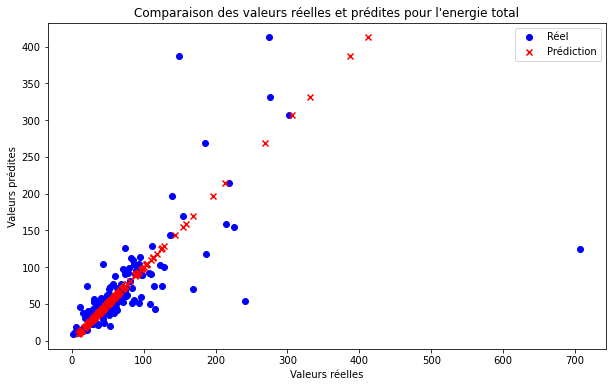

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'ENERGYSTARScore',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'Refrigerated Warehouse_GFA',
                                                   'Parking_GFA',
                                                   'Data Center_GFA',
                                                   'Wholesale '
                                                   'Club/Sup

In [184]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [185]:
model = TransformedTargetRegressor(
    regressor= Ridge(alpha=0.1), func=np.log1p, inverse_func=np.expm1)


Train Mean Squared Error: 1321.450578773087
Train R-squared: 0.7367851570622597
Test Mean Squared Error: 3306.2859185545835
Test R-squared: 0.36698421723623176


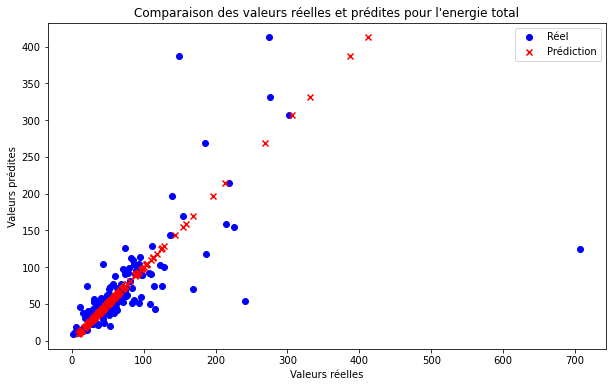

In [186]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

# Ridge sans le Log sur la target

In [187]:
alpha = np.arange(0.1, 10, 0.5)

In [188]:
param={'model__alpha':alpha}
model = Ridge()


cv R-squared 0.7243651373740836
mean_score_time 0.003308534622192383
mean_fit_time 0.00857095718383789
Test Mean Squared Error: 1835.3264125177316
Test R-squared: 0.6486115798010497


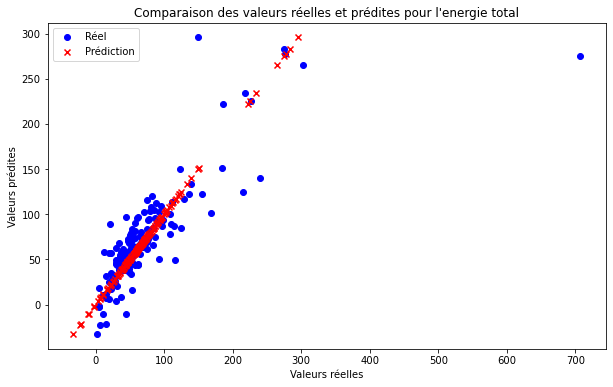

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'ENERGYSTARScore',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'Refrigerated Warehouse_GFA',
                                                   'Parking_GFA',
                                                   'Data Center_GFA',
                                                   'Wholesale '
                                                   'Club/Sup

In [189]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param,  test_size=0.2, random_state=42 )

## Entrainer le meilleure model

In [190]:
model = Ridge(alpha=9.6)

Train Mean Squared Error: 724.9774536547635
Train R-squared: 0.8555944280759145
Test Mean Squared Error: 1835.3264125177316
Test R-squared: 0.6486115798010497


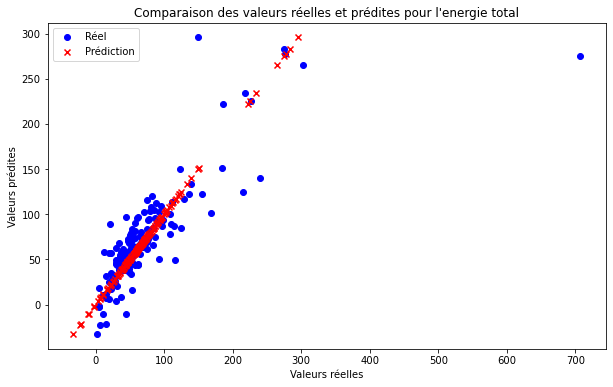

In [191]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

# . Lasso sans le Log sur les target

In [192]:
model =Lasso()


In [193]:
# Créez un dictionnaire des hyperparamètres 
param_grid = {
    'model__alpha':  alpha   # Liste des valeurs d'alpha 

}


cv R-squared 0.7263583994269127
mean_score_time 0.003728818893432617
mean_fit_time 0.011538267135620117
Test Mean Squared Error: 1789.7503909727
Test R-squared: 0.6573374860488067


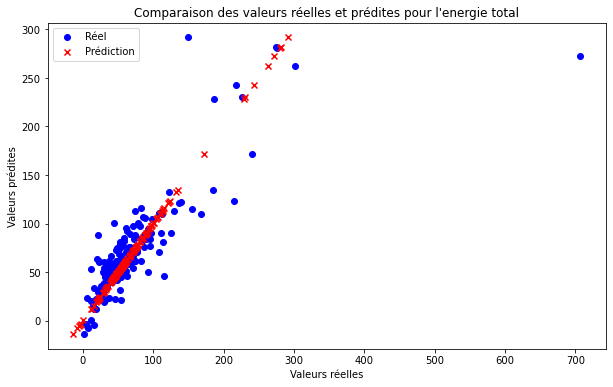

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'ENERGYSTARScore',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'Refrigerated Warehouse_GFA',
                                                   'Parking_GFA',
                                                   'Data Center_GFA',
                                                   'Wholesale '
                                                   'Club/Sup

In [194]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param_grid,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [195]:
model= Lasso(alpha= 0.6)

Train Mean Squared Error: 894.0848017309664
Train R-squared: 0.8219105621951164
Test Mean Squared Error: 1789.7503909727
Test R-squared: 0.6573374860488067


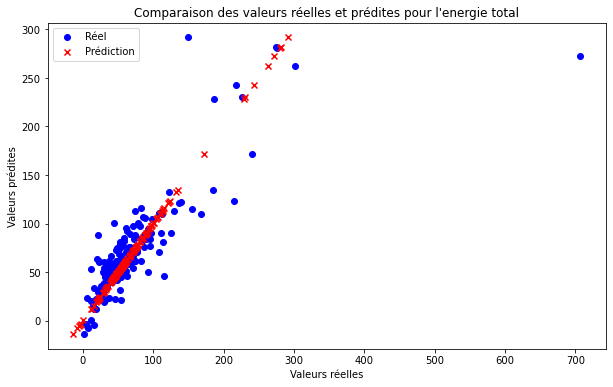

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'ENERGYSTARScore',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'Refrigerated Warehouse_GFA',
                                                   'Parking_GFA',
                                                   'Data Center_GFA',
                                                   'Wholesale '
                                                   'Club/Sup

In [196]:
preprocess_and_train_model(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode,test_size=0.2, random_state=42)

# Lasso avec le Log sur la target

In [197]:
model = TransformedTargetRegressor(
    regressor=Lasso(), func=np.log1p, inverse_func=np.expm1
)

In [198]:
param={'model__regressor__alpha':alpha}


cv R-squared 0.33839112764846124
mean_score_time 0.004790496826171875
mean_fit_time 0.009923362731933593
Test Mean Squared Error: 3865.33298483728
Test R-squared: 0.25995003296355446


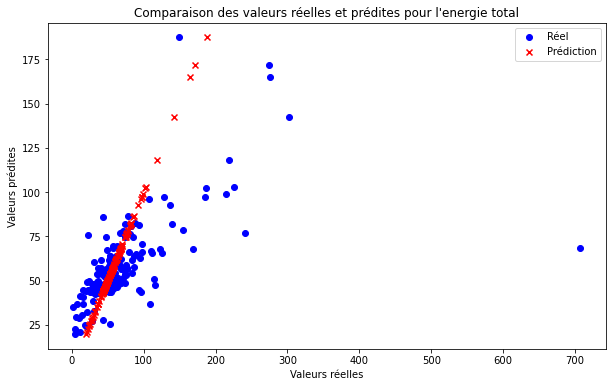

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'ENERGYSTARScore',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'Refrigerated Warehouse_GFA',
                                                   'Parking_GFA',
                                                   'Data Center_GFA',
                                                   'Wholesale '
                                                   'Club/Sup

In [199]:
preprocess_and_train_model_grid_search(features, target, 
                                 model, 
                                 columns_to_normalize, columns_to_encode, param,  test_size=0.2, random_state=42)

## Entrainer le meilleure model

In [200]:
model = TransformedTargetRegressor(
    regressor= Lasso(alpha=0.1), func=np.log1p, inverse_func=np.expm1)


Train Mean Squared Error: 3073.8006195138873
Train R-squared: 0.3877410473886467
Test Mean Squared Error: 3865.33298483728
Test R-squared: 0.25995003296355446


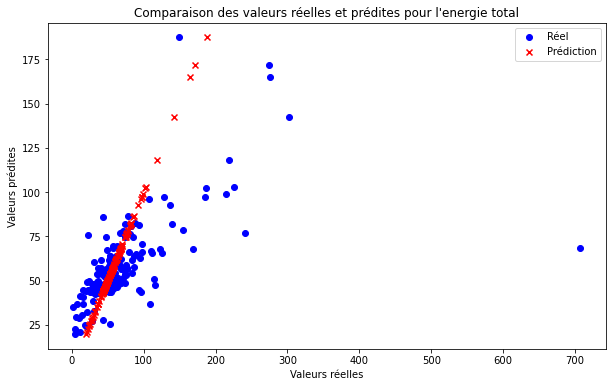

In [201]:
trained_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

Avec le log nous avons des mauvais resultats

# Modele selectionné: Ridge sans le Log sur la target

In [209]:
alpha = arange(10,40 ,1.5)

In [210]:
alpha

array([10. , 11.5, 13. , 14.5, 16. , 17.5, 19. , 20.5, 22. , 23.5, 25. ,
       26.5, 28. , 29.5, 31. , 32.5, 34. , 35.5, 37. , 38.5])

In [211]:
param={'model__alpha':alpha}
model = Ridge()


cv R-squared 0.7305833088581257
mean_score_time 0.003545331954956055
mean_fit_time 0.007356071472167968
Test Mean Squared Error: 1826.913094008807
Test R-squared: 0.6502223792094373


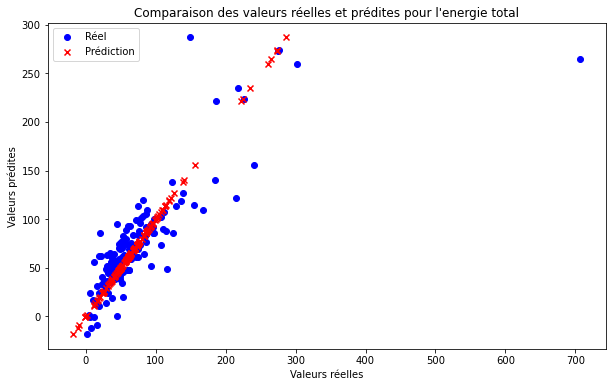

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('normalisation',
                                                  StandardScaler(),
                                                  ['PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'ENERGYSTARScore',
                                                   'NumberofFloors',
                                                   'perc-elec_use',
                                                   'perc-gaz_use',
                                                   'perc-steam_use',
                                                   'Refrigerated Warehouse_GFA',
                                                   'Parking_GFA',
                                                   'Data Center_GFA',
                                                   'Wholesale '
                                                   'Club/Sup

In [212]:
preprocess_and_train_model_grid_search(features, target, model,columns_to_normalize, columns_to_encode, param,  test_size=0.2, random_state=42 )

## Entrainer le meilleure model

In [213]:
model = Ridge(alpha=37.0)

Train Mean Squared Error: 827.6227394035768
Train R-squared: 0.8351488940539321
Test Mean Squared Error: 1826.913094008807
Test R-squared: 0.6502223792094373


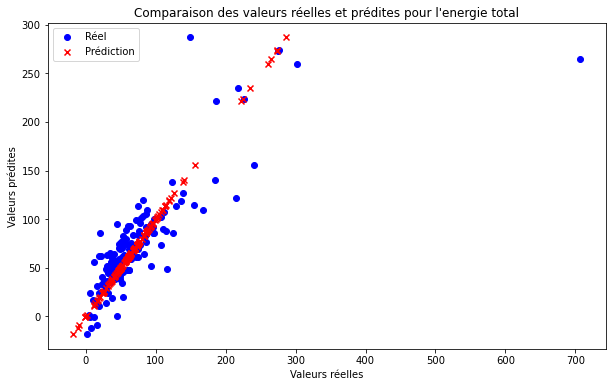

In [214]:
best_pipeline = preprocess_and_train_model(features, target, model, columns_to_normalize, columns_to_encode, test_size=0.2, random_state=42 )

# Observer les valeurs mal prédites

In [215]:
find_max_ten_error_values_two(features, target,best_pipeline )

Max Error Feature Values:


,PropertyGFAParking,PropertyGFABuilding(s),PrimaryPropertyType,ENERGYSTARScore,NumberofFloors,YearBuilt,Neighborhood,perc-elec_use,perc-gaz_use,perc-steam_use,Refrigerated Warehouse_GFA,Parking_GFA,Data Center_GFA,Wholesale Club/Supercenter_GFA,Other - Restaurant/Bar_GFA,K-12 School_GFA,Pre-school/Daycare_GFA,Social/Meeting Hall_GFA,Residence Hall/Dormitory_GFA,Supermarket/Grocery Store_GFA,Courthouse_GFA,Laboratory_GFA,Fitness Center/Health Club/Gym_GFA,Other - Services_GFA,Other_GFA,Convenience Store without Gas Station_GFA,Financial Office_GFA,Worship Facility_GFA,Senior Care Community_GFA,Self-Storage Facility_GFA,Other - Education_GFA,Restaurant_GFA,Non-Refrigerated Warehouse_GFA,Bank Branch_GFA,Office_GFA,Medical Office_GFA,Other - Recreation_GFA,Other - Entertainment/Public Assembly_GFA,Manufacturing/Industrial Plant_GFA,College/University_GFA,Performing Arts_GFA,Retail Store_GFA,Food Service_GFA,Other - Technology/Science_GFA,Multifamily Housing_GFA,Hospital (General Medical & Surgical)_GFA,Distribution Center_GFA,Hotel_GFA
215,104922,108912,Mixed Use Property,100.0,6,2001,LAKE UNION,0.997915,0.002085,0.0,0.0,0.49067,0.254333,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,0,85126,Small- and Mid-Sized Office,1.0,3,1929,Delridge,0.964492,0.035508,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.957710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
433,0,429405,Other,98.0,33,1981,DOWNTOWN,0.999455,0.000545,0.0,0.0,0.00000,0.510001,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,48510,65434,Large Office,1.0,3,1960,NORTHEAST,0.995049,0.004951,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.574265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,0,101101,Distribution Center,1.0,1,1949,GREATER DUWAMISH,0.999239,0.000761,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1035,0,45155,Supermarket / Grocery Store,6.0,1,1986,NORTHWEST,0.635951,0.364049,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1261,38585,38000,Supermarket / Grocery Store,18.0,1,1997,NORTHEAST,0.583344,0.416656,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.54119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1033,0,24377,Supermarket / Grocery Store,6.0,1,1973,NORTHEAST,0.578362,0.421638,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0,25762,Supermarket / Grocery Store,100.0,2,1946,SOUTHWEST,1.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
818,0,38845,Retail Store,82.0,2,1992,GREATER DUWAMISH,0.475697,0.524303,0.0,0.0,0.15446,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


1.Dans la liste des 10 predictions les plus mauvaises nous observons que les propriétés sans parking sont les plus présentes et   les batiments qui ne consomment pas de vapeur(steam)
2.Dans le graphique des valeurs réelles aux valeurs prédites ce se sont quelques bâtiments avec des consommations extrêmes que le modèle a du mal à prédire

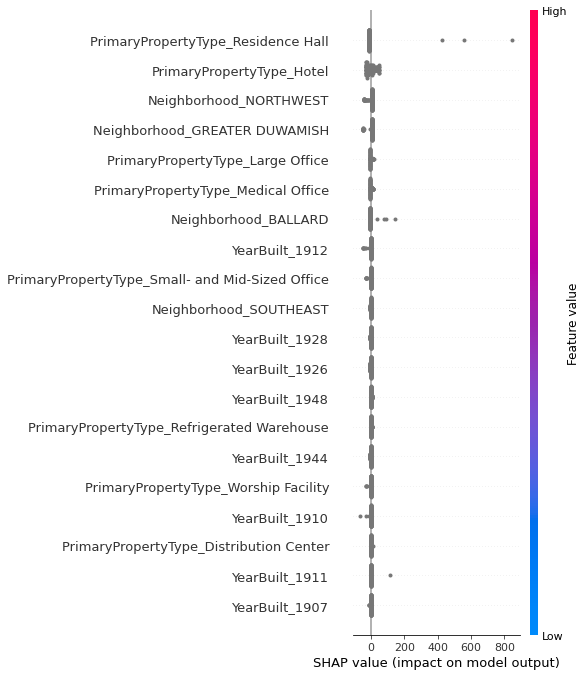

In [218]:
def plot_feature_importance_shap(pipeline, X):
    # Obtenir le transformateur de prétraitement et le modèle du pipeline
    transformateurs, model = pipeline.named_steps["preprocess"], pipeline.named_steps["model"]
    
    # Obtenir les noms des colonnes après encodage en utilisant le ColumnTransformer
    encoded_column_names = transformateurs.transformers_[1][1].get_feature_names_out(input_features=columns_to_encode)
    
    # Transformer les données d'entrée en données encodées
    transformed_X = transformateurs.transform(X)
    
    # Créer un objet explainer SHAP
    explainer = shap.Explainer(model, transformed_X)
    
    # Calculer les valeurs SHAP
    shap_values = explainer(transformed_X)
    
    # Résumer les valeurs SHAP
    shap.summary_plot(shap_values, feature_names=encoded_column_names)
    plt.show()


# Assurez-vous que X_test est défini dans votre environnement
# Appeler la nouvelle fonction pour afficher les importances des caractéristiques avec SHAP
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

plot_feature_importance_shap(best_pipeline, X_test)

# Feature importance Local

In [219]:

shap.initjs()
# Extraire le préprocesseur et le modèle du pipeline
preprocessor = best_pipeline.named_steps['preprocess']
model = best_pipeline.named_steps['model']


In [220]:
# Transformez les données d'entraînement en utilisant le préprocesseur
X_train_transformed = preprocessor.transform(X_train.iloc[:10,:])

# Initialiser l'explainer SHAP pour le modèle Ridge
explainer = shap.KernelExplainer(model.predict, X_train_transformed)


In [221]:
# Calculer les valeurs SHAP pour un échantillon de vos données
shap_values = explainer.shap_values(X_train_transformed)
shap_values_array = shap_values[0]
# Afficher le diagramme de force SHAP pour une instance spécifique
instance_index = 0  # par exemple, pour le premier échantillon de données
# Convertir la matrice sparse en matrice dense
X_train_transformed_dense = X_train_transformed.toarray()
shap.force_plot(explainer.expected_value, shap_values_array[instance_index, :], X_train_transformed_dense[instance_index, :])

  0%|          | 0/10 [00:00<?, ?it/s]

In [222]:
# Récupérer les noms des variables après one-hot encoding
onehot_columns = list(trained_pipeline.named_steps['preprocess'].transformers_[1][1].get_feature_names_out(columns_to_encode))

# Combiner les noms de toutes les colonnes (celles qui ont été normalisées et celles qui ont été encodées)
feature_names = columns_to_normalize + onehot_columns

In [223]:
shap.force_plot(explainer.expected_value, shap_values_array[instance_index, :], X_train_transformed_dense[instance_index, :], feature_names=feature_names)
